In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Bank Marketing Campaign Analysis and Prediction**

## 📊 Dataset Overview

The dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset), contains information about:
- Client demographics (age, job, marital status, etc.)
- Financial indicators (loans, housing, balance)
- Details of the marketing contact (contact type, call duration, day/month)
- Outcomes of previous marketing campaigns
- The final outcome: whether the client subscribed to a term deposit (`y`)

## **1. BUSINESS UNDERSTANDING**

### 1.1 Business Context

The dataset for this project comes from a Portuguese bank's direct marketing campaigns for **term deposits**. These campaigns were primarily conducted via phone calls. Term deposits are a crucial financial product for banks, providing stable funds that contribute to liquidity and lending power.

The bank's original marketing approach lacked strategic targeting. It relied on **cold-calling** a wide range of individuals, leading to:
* High operational costs 
* Low conversion rates
* Potential customer churn from irrelevant contact

This project presents a valuable opportunity for a data science solution. By leveraging historical data, we can understand which customers are most likely to subscribe, predict future responses, and create strategies to **optimize campaign performance**.

---

### 1.2 Problem Statement

The bank's direct marketing campaigns suffer from a critical inefficiency: an average success rate, **with only 11%**. This significant imbalance means a lot of time and money are spent with minimal return on investment. Repeated, untargeted outreach can also damage brand reputation and increase customer attrition.

The core issue is the absence of an intelligent, data-driven system to guide marketing efforts. There is no predictive model to identify likely subscribers or a segmentation strategy to prioritize high-potential leads.

This project aims to solve this by developing a **machine learning-based classification system** to:
* Identify likely subscribers
* Reduce unnecessary calls
* Enhance overall campaign effectiveness

---

### 1.3 Business Goals

The main goal is to **maximize successful term deposit subscriptions** while **reducing marketing costs** and maintaining a positive customer relationship. The bank needs to shift from a cold-calling approach to a targeted, data-driven strategy.

Secondary goals include:
* **Enhancing operational efficiency** by reducing wasted calls.
* **Minimizing customer churn** through more relevant communication.
* **Increasing the Return on Marketing Investment**.
* Providing **explainable insights** to support marketing decisions.

The final solution should be both **predictive** (guiding future campaigns) and **prescriptive** (informing tactical decisions on who, when, and how to call).

---

### 1.4 Stakeholders and Their Responsibilities

This project involves several key stakeholders:

* **Chief Marketing Officer**: The primary end-users who will execute campaigns based on the model’s insights. They need **interpretable results** to create targeted strategies.

---

### 1.5 Evaluation Metrics


* **F2 Score**: Leaning on the recall, providing a robust aggresive yet balanced measure.
* **Recall**: Measures the proportion of actual positive cases that are correctly identified. Important for not missing potential customers.
* **Precision**: Measures the proportion of predicted positive cases that are actually positive. Important for minimizing wasted outreach.

**Why Recall & F2 scores the most suitable metrics for this project?**

In this campaign, every outbound call has a cost. On average, one call costs about €50. A successful deposit, generates a reward of around €233 in average. After subtracting the call cost, the net gain is €183 per successful depositor. This means the financial downside of calling a non-depositor (–€50) is much smaller than the upside of reaching a true depositor (+€183). Missing a depositor is therefore far more costly than making a few extra unsuccessful calls.

The F1-score treats precision and recall as equally important. But in this business case, recall is more valuable. The F2-score adjusts for that by giving recall twice as much weight as precision. In practice, this means the model is tuned to maximize the number of depositors captured, even if it makes more calls to non-depositors. This tradeoff aligns with the profit structure of the campaign.


---

### 1.6 Analytical Approach

This project will follow a structured approach based on the **CRISP-DM framework**:

1.  **Business Understanding**: Define project goals, stakeholders, and business impact.
2.  **Data Understanding**: Explore the dataset's structure, quality, and key attributes.
3.  **Data Cleaning and Preprocessing**: Handle missing values, encode categorical variables, scale numerical features, and address **class imbalance** using techniques like SMOTE or class weighting.
4.  **Exploratory Data Analysis (EDA)**: Use descriptive statistics and visualizations to uncover patterns related to subscription outcomes.
5.  **Modeling**: Implement and tune classification algorithms (e.g., Logistic Regression, Random Forest, XGBoost) using cross-validation.
6.  **Evaluation and Interpretation**: Evaluate models using the defined metrics (Recall, F2, ROC-AUC) and interpret their behavior using tools like **SHAP values** and feature importance.
7.  **Recommendations**: Translate findings into actionable strategic recommendations for future marketing campaigns.

## **2. DATA UNDERSTANDING**

### 2.1 Reading Data

In [2]:
data = pd.read_csv("bank-additional-full.csv", sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 2.2 Data Frame Information

In [3]:
data.shape

(41188, 21)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.3 Data Unique Value & Description

In [6]:
def detailed_unique_data(data):
    data_unique = pd.DataFrame({
        'Columns': data.columns,
        'Unique Count': [data[col].nunique() for col in data.columns],
        'Unique Values Example': [data[col].unique()[:10] for col in data.columns],
        'Data Type': [data[col].dtype for col in data.columns]
    })
    return data_unique


unique_data_summary = detailed_unique_data(data)
pd.set_option('display.max_colwidth', None)
display(unique_data_summary)

,Columns,Unique Count,Unique Values Example,Data Type
0,age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29]",int64
1,job,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown]",object
2,marital,4,"[married, single, divorced, unknown]",object
3,education,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]",object
4,default,3,"[no, unknown, yes]",object
5,housing,3,"[no, yes, unknown]",object
6,loan,3,"[no, yes, unknown]",object
7,contact,2,"[telephone, cellular]",object
8,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]",object
9,day_of_week,5,"[mon, tue, wed, thu, fri]",object


In [7]:
print('Descriptive Stats for Numerical Feature')
display(data.describe(include='number'))

print('Descriptive Stats for Categorical Feature')
display(data.describe(include='object'))

Descriptive Stats for Numerical Feature


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Descriptive Stats for Categorical Feature


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### 2.4 Data Duplicates and Missing Value

In [8]:
full_duplicates = data[data.duplicated()]
print(f"Number of fully duplicated rows: {len(full_duplicates)}")

Number of fully duplicated rows: 12


In [9]:
# Check for missing values in each column
missing_values = data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values
missing_percentage = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)

# Combine
missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
display(missing_data)

,Missing Count,Missing Percentage
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


In [10]:
# Check proportion of 'unknown' values
unknown_counts = (data == 'unknown').sum()
unknown_ratio = unknown_counts / data.shape[0]
unknown_ratio[unknown_ratio > 0].sort_values(ascending=False)

default      0.208726
education    0.042027
housing      0.024036
loan         0.024036
job          0.008012
marital      0.001942
dtype: float64

In [11]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 2.5 Data Correlation between each feature

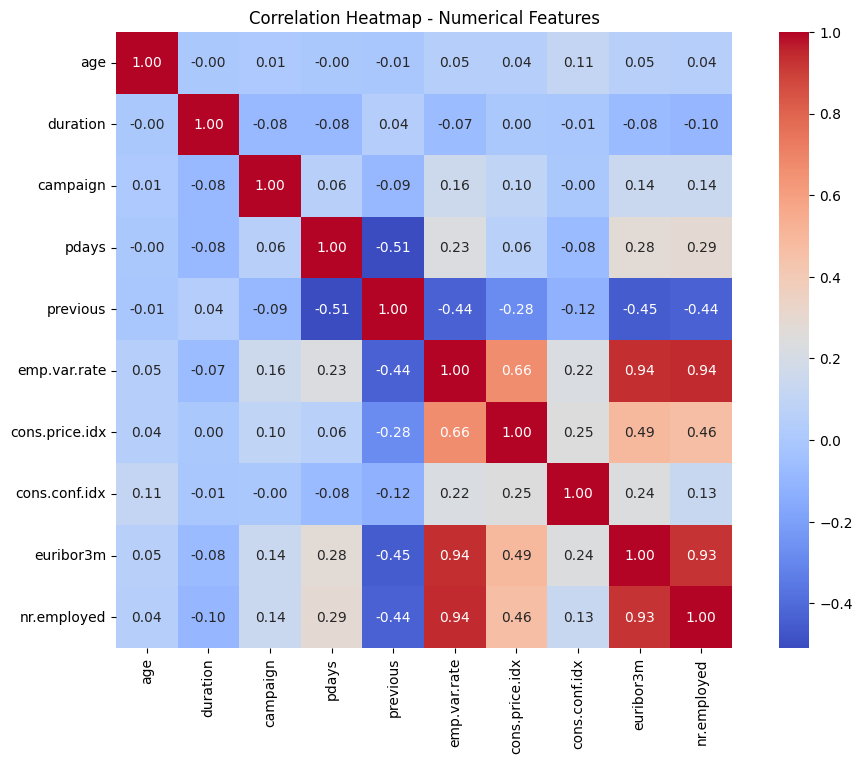

In [12]:
plt.figure(figsize=(12, 8))
corr = data[numerical_cols].corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap - Numerical Features")
plt.show()

## **3. DATA CLEANING**

### Setup

In [13]:
df = data.copy()

### 3.1 Standardize Name

In [14]:
df.columns = df.columns.str.lower()

In [15]:
df['education'] = data['education'].str.replace('.', ' ', regex=False)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic 6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 3.2 Handling Missing Value

In [16]:
# Replacing missing values with mode

coll = ['job', 'marital', 'education']
for i in coll:
    df[i] = df[i].replace('unknown', np.nan)
    mode_val = df[i].mode()[0]
    df[i] = df[i].fillna(mode_val)

In [17]:
# Map housing & loan to 'yes'

coll = ['housing', 'loan']
for i in coll:
    df[i] = df[i].replace('unknown','yes')

### 3.3 Converting Data Types

In [18]:
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome', 'y'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

### 3.4 Handling Duplicates

In [19]:
# Remove duplicates
df = df.drop_duplicates()

# Check for constant (zero-variance) columns
df.nunique()[df.nunique() == 1]

Series([], dtype: int64)

### 3.5 Grouping Data

#### *Numeric Features*

In [20]:
# Previously contacted

df[['previous', 'pdays']][(df['pdays'] == 999)& (df['previous'] == 0)]
df['previous_contacted'] = np.where(df['pdays'] == 999, 0, 1)

In [21]:
df[['previous', 'pdays']][(df['pdays'] == 999)& (df['previous'] == 0)]

,previous,pdays
0,0,999
1,0,999
2,0,999
3,0,999
4,0,999
...,...,...
41181,0,999
41183,0,999
41184,0,999
41185,0,999


In [22]:
# Age Group

age_bins = [0, 25, 35, 45, 60, df['age'].max()]
age_labels = ['Young Adults\n(Under 25)', 'Early Adults\n(23 - 35)', 'Middle Adults\n(36-45)', 'Old Adults\n(46-60)', 'Elders\n(60+)']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [23]:
# Duration

duration_bins = [0, 100, 300, 600, 1000, df['duration'].max()]
duration_labels = ['<100s', '100-300s', '300-600s', '600-1000s', '1000+s']
df['duration_group'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels)

In [24]:
df = df.dropna(subset=['duration_group'])

In [25]:
# Campaign

df['campaign_group'] = pd.cut(df['campaign'], bins=[0, 2, 4, 10, df['campaign'].max()], labels=['1-2', '3-4', '5-10', '10+'])

#### *Categorical Feature*

In [26]:
replacement_mapping = {'basic 4y': 'basic',
                       'basic 6y': 'basic',
                       'basic 9y': 'basic'}

# Use the replace method to group the categories
df['education'] = df['education'].replace(replacement_mapping)

The basic education have more or less the same in terms of conversion rate, this maybe due to they all refer to variations of basic education, and splitting them likely adds noise rather than signal.

#### *Socio-Economic Feature*

In [27]:
df['cpi_group'] = pd.qcut(df['cons.price.idx'], q=4, precision=2, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df['cci_group'] = pd.qcut(df['cons.conf.idx'], q=4, precision=1, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df['euribor_group'] = pd.qcut(df['euribor3m'], q=4,precision=2, labels=['Q1', 'Q2', 'Q3', 'Q4'])

### 3.6 Handling Outliers

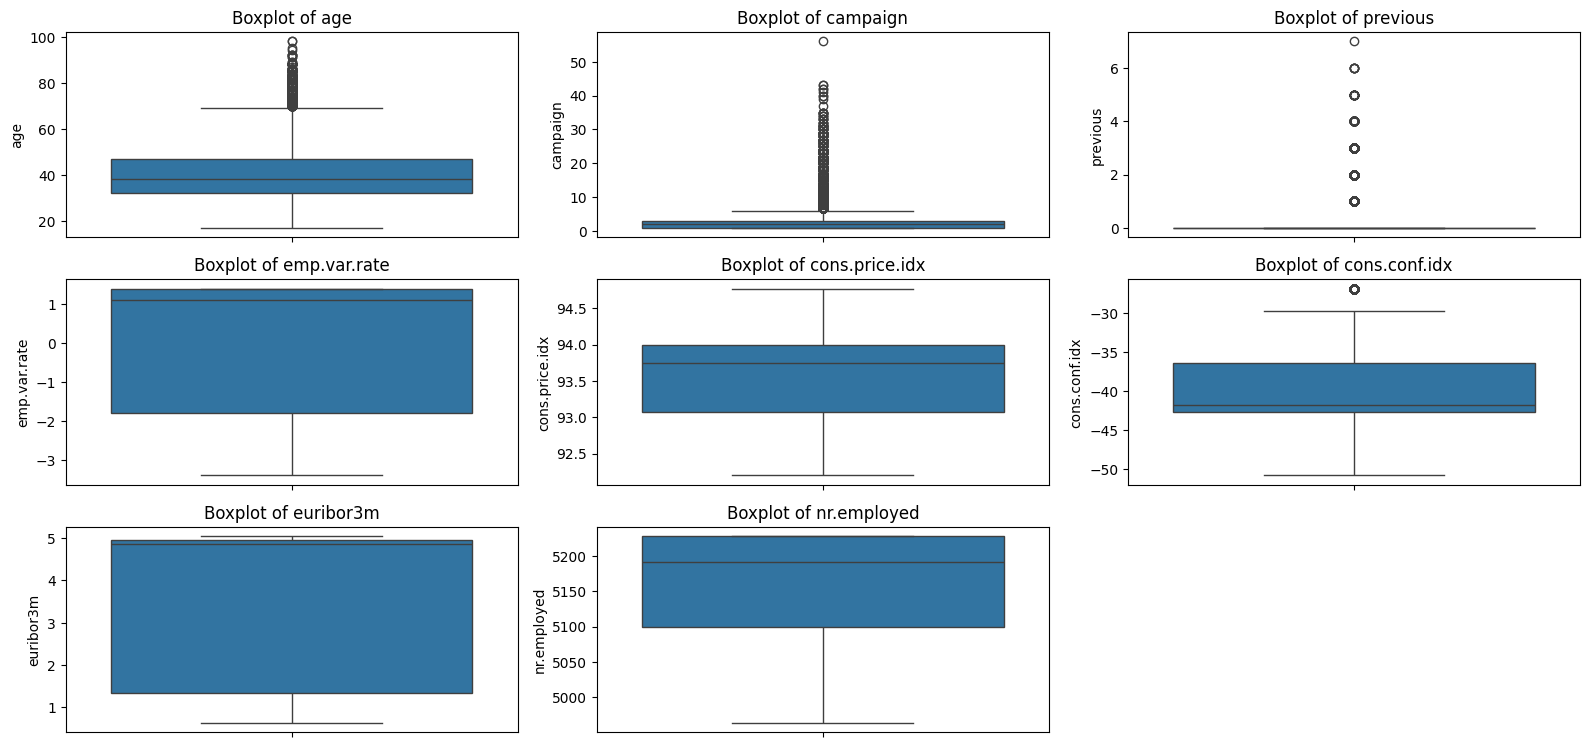

In [28]:
num_cols = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 
            'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [29]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_IQR = df[(df['age'] < lower_bound_iqr) | (df['age'] > upper_bound_iqr)]

print(f"Column: 'age', IQR_Lower: {lower_bound_iqr}, IQR_Upper: {upper_bound_iqr}, IQR_Outliers: {len(outliers_IQR)}")

Column: 'age', IQR_Lower: 9.5, IQR_Upper: 69.5, IQR_Outliers: 468


In [30]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,y,previous_contacted,age_group,duration_group,campaign_group,cpi_group,cci_group,euribor_group
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,4.857,5191.0,no,0,Old Adults\n(46-60),100-300s,1-2,Q3,Q3,Q2
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,4.857,5191.0,no,0,Old Adults\n(46-60),100-300s,1-2,Q3,Q3,Q2
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,4.857,5191.0,no,0,Middle Adults\n(36-45),100-300s,1-2,Q3,Q3,Q2
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,4.857,5191.0,no,0,Middle Adults\n(36-45),100-300s,1-2,Q3,Q3,Q2
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,4.857,5191.0,no,0,Old Adults\n(46-60),300-600s,1-2,Q3,Q3,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional course,no,yes,no,cellular,nov,fri,...,1.028,4963.6,yes,0,Elders\n(60+),300-600s,1-2,Q4,Q1,Q1
41184,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,...,1.028,4963.6,no,0,Old Adults\n(46-60),300-600s,1-2,Q4,Q1,Q1
41185,56,retired,married,university degree,no,yes,no,cellular,nov,fri,...,1.028,4963.6,no,0,Old Adults\n(46-60),100-300s,1-2,Q4,Q1,Q1
41186,44,technician,married,professional course,no,no,no,cellular,nov,fri,...,1.028,4963.6,yes,0,Middle Adults\n(36-45),300-600s,1-2,Q4,Q1,Q1


## **4. EDA**

### 4.1 Univariate Analysis

In [31]:
numerical_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

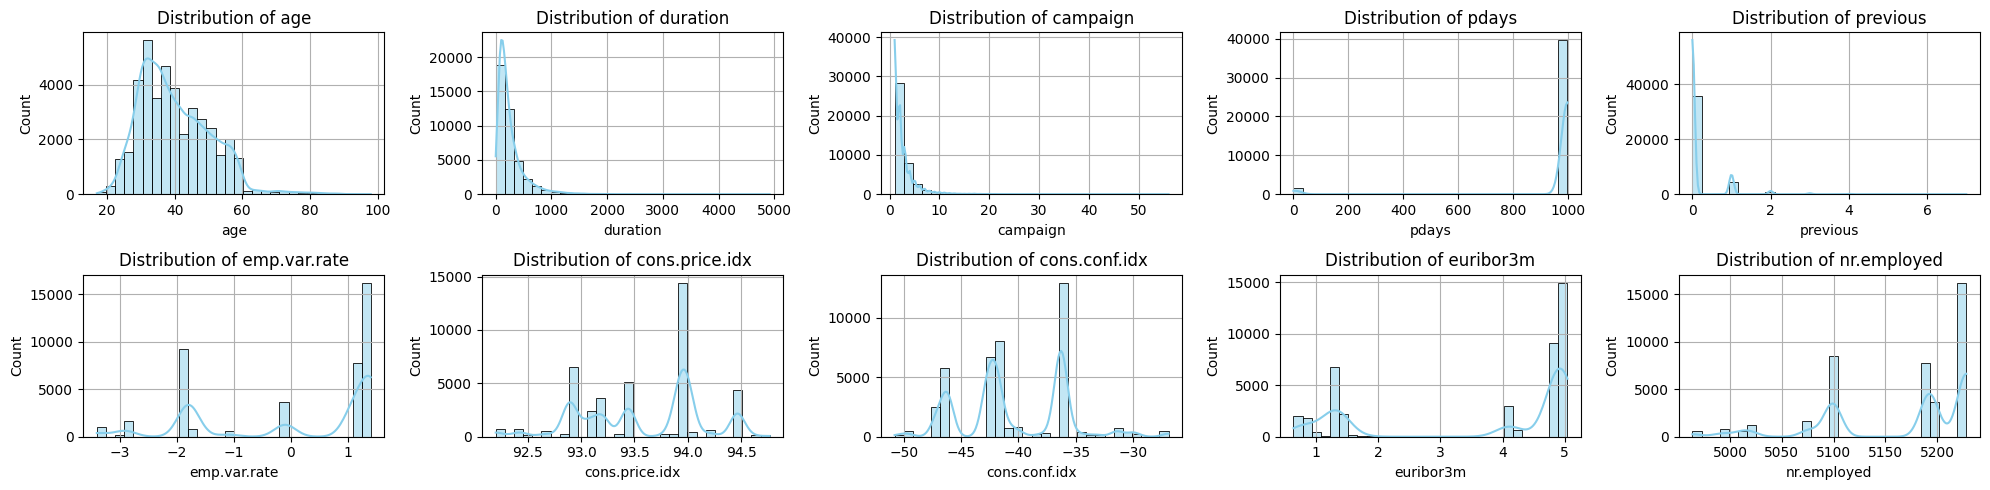

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 5))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axs[i], color='skyblue', bins=30)
    axs[i].set_title(f'Distribution of {col}', fontsize=12)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Aside from 'age' and 'duration', the numerical features in the preceding plot show irregular and scattered distributions, indicating they likely contain only a few unique values.

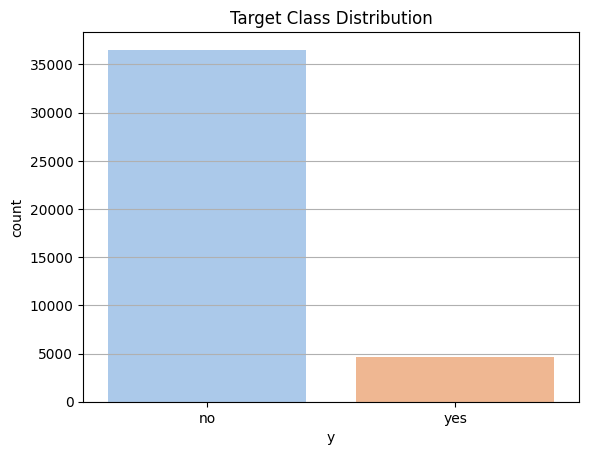

In [33]:
sns.countplot(data=df, x='y', palette='pastel')
plt.title('Target Class Distribution')
plt.grid(axis='y')
plt.show()

Summary:

Several variables such as duration, campaign, and previous show strong right skew and contain outliers. The pdays variable is mostly 999, indicating no prior contact, and has been flagged for transformation. Also, the class distribution of the target variable y shows a strong imbalance (88.4% "no", 11.6% "yes"), which needs to be considered during modeling.

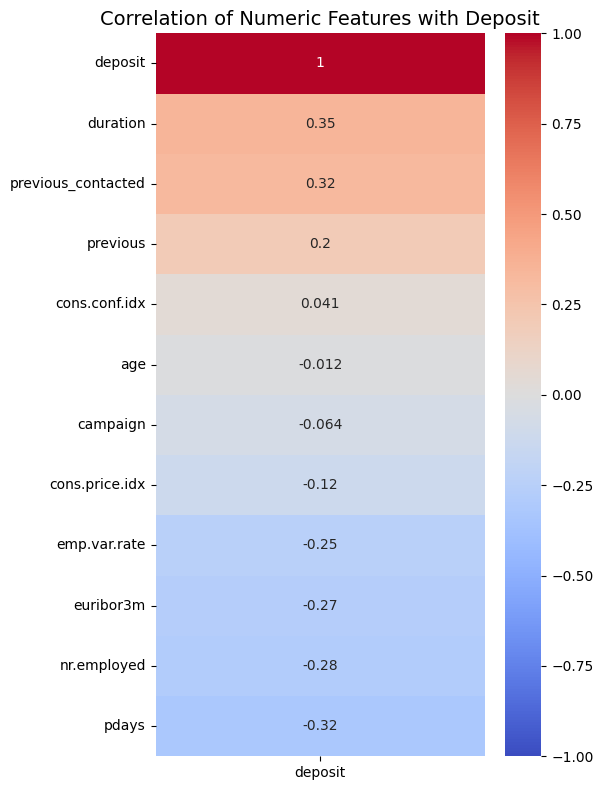

In [34]:
df=df.rename(columns={'y':'deposit'})
df['deposit']=df['deposit'].map({'yes':1,'no':0})

df['deposit']=df['deposit'].astype('int')
corr = df.corr(numeric_only=True)['deposit'].sort_values(ascending=False)

# Get numeric correlations
corr_matrix = df.corr(numeric_only=True, method='spearman')

# Focus only on deposit correlation
deposit_corr = corr_matrix[['deposit']].sort_values(by='deposit', ascending=False)

# Plot heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(deposit_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

plt.title('Correlation of Numeric Features with Deposit', fontsize=14)
plt.tight_layout()
plt.show()

### 4.2 Bivariate Analysis

#### Setup

In [35]:
conver_rate_col = ['age_group', 'duration_group', 'campaign_group', 'previous_contacted']
color_bar = ['darkcyan', 'coral','goldenrod', 'blue']

In [36]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def plot_conversion_rate(df, col, color='skyblue'):
    # Conversion rate (%)
    conv = df.groupby(col)['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
    conv = conv[[1]].sort_values(by=1, ascending=False)

    # Absolute counts
    counts = df.groupby(col)['deposit'].value_counts().unstack().fillna(0)
    counts = counts[[1]].reindex(conv.index)   # align with sorted order

    ax = conv.plot(kind='bar', color=color, figsize=(8,5), legend=False)
    ax.set_ylabel("Conversion Rate (%)")
    ax.set_title(f"Conversion Rate by {col.replace('_',' ').title()}")
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, conv[1].max() * 1.2)

    if col == 'previous_contacted':
        plt.xticks(ticks=[0, 1], labels=['Not Previously Contacted', 'Previously Contacted'], rotation=0)

    # Annotate each bar with conversion rate (%) + count (n)
    for p, n in zip(ax.patches, counts[1]):
        ax.annotate(f"{p.get_height():.1f}%\n(n={int(n)})", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9, color='black')

    plt.show()


In [37]:
import matplotlib.pyplot as plt

def plot_conversion_rate_horizontal(df, col, color='skyblue'):
    # Conversion rate (%)
    conv = df.groupby(col)['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
    conv = conv[[1]].sort_values(by=1, ascending=True)  # ascending for horizontal bars

    # Absolute counts
    counts = df.groupby(col)['deposit'].value_counts().unstack().fillna(0)
    counts = counts[[1]].reindex(conv.index)   # align with sorted order

    ax = conv.plot(kind='barh', color=color, figsize=(8,5), legend=False)
    ax.set_xlabel("Conversion Rate (%)")
    ax.set_title(f"Conversion Rate by {col.replace('_',' ').title()}")
    ax.set_xlim(0, conv[1].max() * 1.2)

    # Annotate each bar
    for p, n in zip(ax.patches, counts[1]):
        ax.annotate(f"{p.get_width():.1f}%  (n={int(n)})", 
                    (p.get_width() + 0.5, p.get_y() + p.get_height()/2),
                    ha='left', va='center', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()


#### Age Group

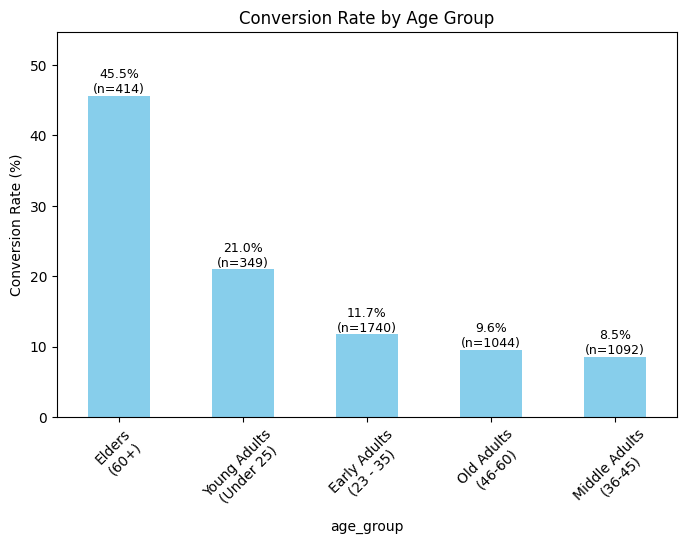

In [38]:
plot_conversion_rate(df, 'age_group')

**Insight**: 
- Elders (60+): higher financial buffers + risk aversion → term deposits feel safe and familiar. Prior exposure to the bank also helps.

- Young adults: a meaningful minority are motivated to start saving (first job/first assets). They’re responsive when the value prop is simple and digital-first.

- 30–60 bracket: heavy competing cash needs (mortgage, children, loans) and more alternatives (mutual funds, ETFs) → lower conversion.

**Reasoning**: Older customers typically have more stable income and accumulated savings, making them better prospects for term deposits. Younger customers may prioritize liquidity for daily needs.

**Actionable**: Prioritize older age groups for targeted campaigns. For younger groups, tailor communication around future benefits and savings for life goals.

#### Duration

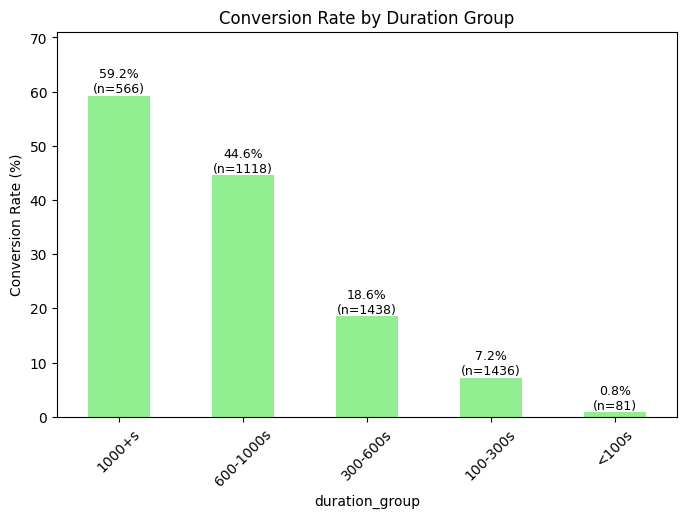

In [39]:
plot_conversion_rate(df, 'duration_group', color='lightgreen')

**Insight**: Very short calls (<100 seconds) almost never result in conversion, while calls lasting over 600 seconds achieve much higher rates.

**Reasoning**: Longer conversations allow for building trust and explaining the product value. Very short calls likely reflect quick rejections.

**Actionable**: Train telemarketers to engage customers beyond 3–5 minutes. Flag calls under 100 seconds as "lost interest" and redirect efforts.

#### Previously Contacted

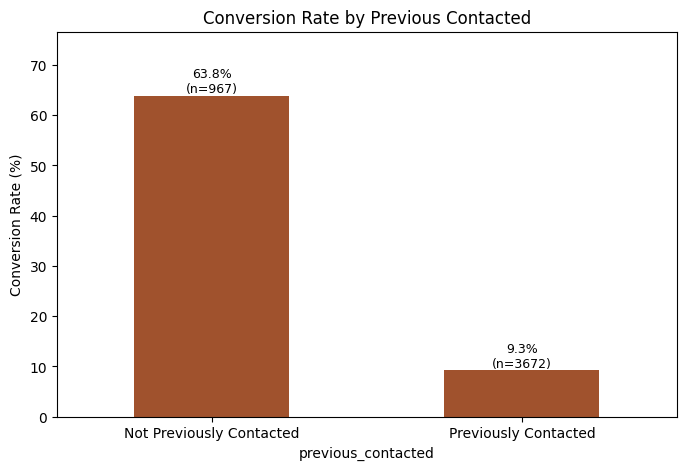

In [40]:
plot_conversion_rate(df, 'previous_contacted', color='sienna')

**Insight**: Customers contacted in previous campaigns show much higher conversion compared to first-time contacts.

**Reasoning**: Warm leads are more receptive; prior exposure builds familiarity and trust.

**Actionable**: Prioritize follow-up with previously contacted leads before cold-calling new ones.

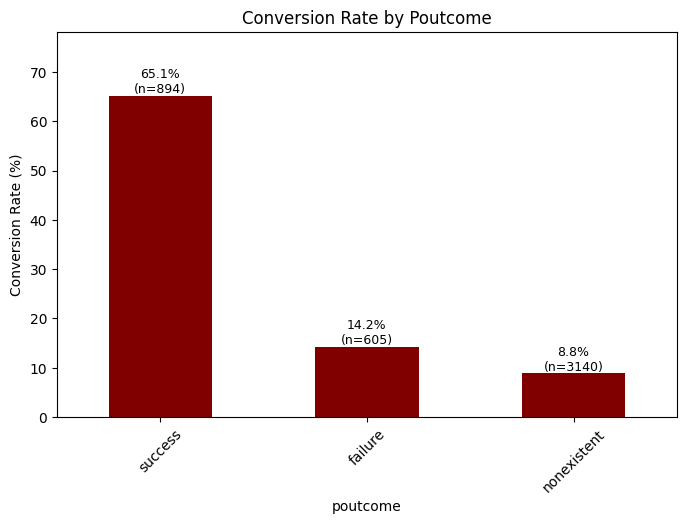

In [41]:
plot_conversion_rate(df, 'poutcome', color='maroon')

#### Campaign

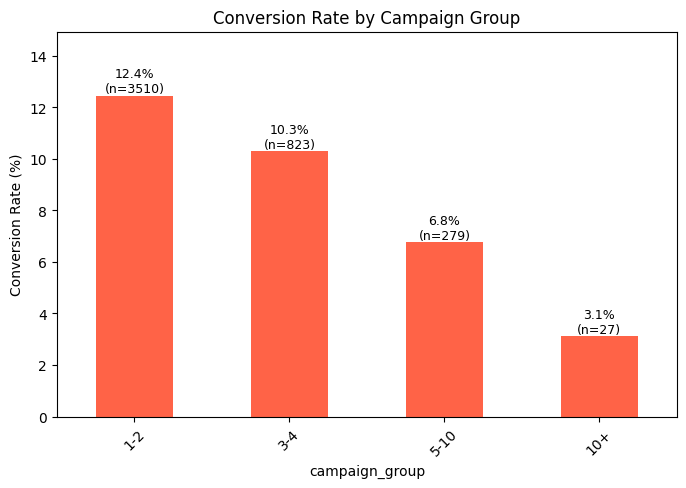

In [42]:
plot_conversion_rate(df, 'campaign_group', color='tomato')

**Insight**: Customers contacted only 1–2 times convert at a higher rate than those repeatedly contacted (>5 times). Too many calls reduce effectiveness.

**Reasoning**: Repeated attempts create call fatigue and customer resistance.

**Actionable**: Optimize campaign intensity. Limit retries per client to avoid diminishing returns. Focus on quality engagement rather than quantity.

#### Job

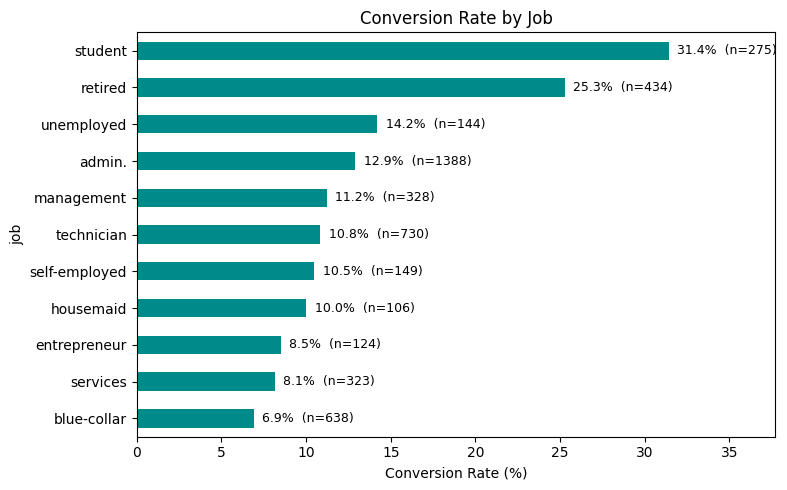

In [43]:
plot_conversion_rate_horizontal(df, 'job', color='darkcyan')

**Insight**: Retired and student customers show the highest conversion; blue-collar and self-employed the lowest.

**Reasoning**: Retirees have accumulated funds, while students may be open to saving for the future. Income volatility lowers conversion for blue-collar/self-employed.

**Actionable**: Segment by job type and design tailored offers (e.g., "secure retirement" products for retirees).

#### Marital

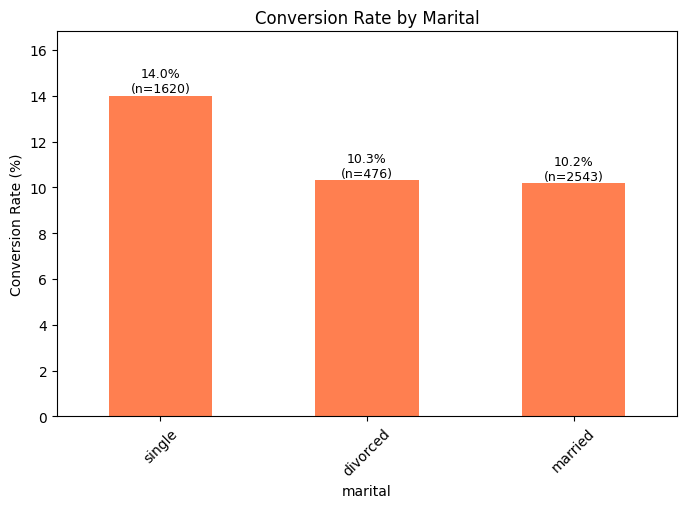

In [44]:
plot_conversion_rate(df, 'marital', color='coral')

**Insight**: Singles convert more than married/divorced.

**Reasoning**: Singles may have fewer financial responsibilities, making them more flexible in investing.

**Actionable**: Messaging could emphasize independence and financial growth for singles, while for married/divorced, emphasize family security.

#### Education

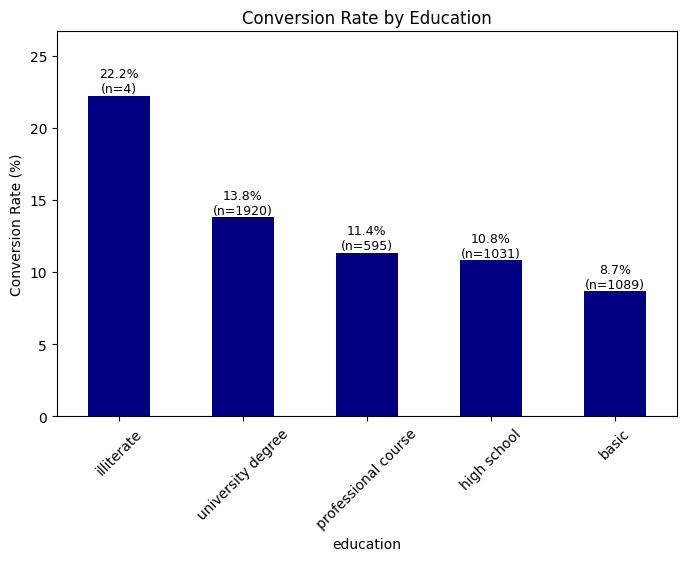

In [45]:
plot_conversion_rate(df, 'education', color='navy')

**Insight**: Illiterate customers have the highest conversion rate but on a small sample, while higher education levels show lower conversion more or so on the same level.

**Reasoning**: Customers with less formal education may be more risk-averse and trust the bank’s advice, making them more likely to choose the "safe" option of a term deposit. Meanwhile, more educated individuals may explore other investment alternatives with potentially higher returns.

**Actionable:**

- For illiterate/low-education groups, maintain simple, trust-focused messaging (“secure, guaranteed savings”).

- For higher-education groups, emphasize comparative benefits of deposits versus other investments and highlight flexible savings products.

#### Contact

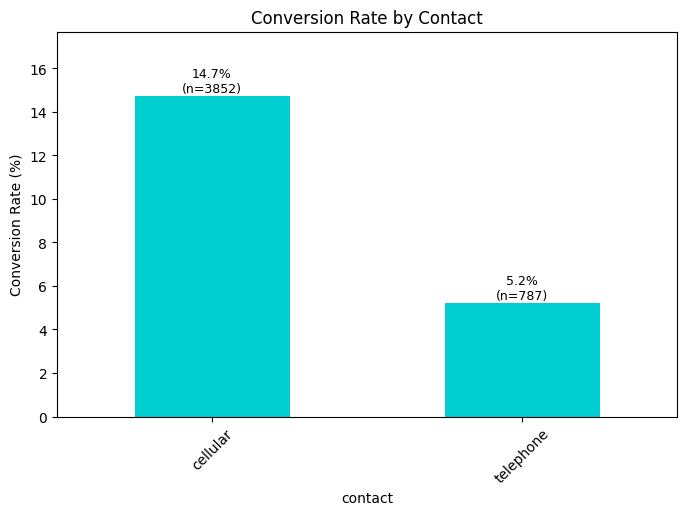

In [46]:
plot_conversion_rate(df, 'contact', color='darkturquoise')

**Insight**: Cellular contacts yield higher conversions than telephone.

**Reasoning**: Mobile phones offer flexibility, while landlines may indicate outdated or less engaged users.

**Actionable**: Prioritize mobile contact campaigns, reduce landline efforts.

#### Day of the Week

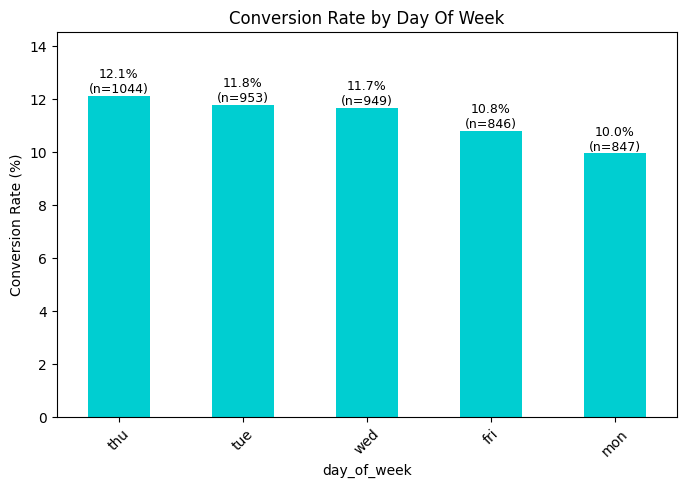

In [47]:
plot_conversion_rate(df, 'day_of_week', color='darkturquoise')

**Insight**: Mid-week (Tue–Thu) shows higher conversions than Monday/Friday but not by much.

**Reasoning**: Mid-week (Tue–Thu) shows higher conversions than Monday/Friday but not by much.

**Actionable**: Still Schedule all call spread across the week.

#### Month

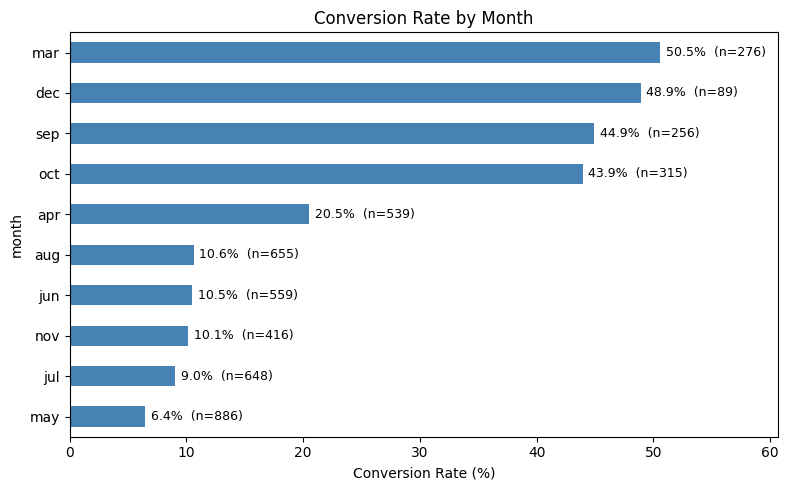

In [48]:
plot_conversion_rate_horizontal(df, 'month', color='steelblue')

**Insight**: May, September, October, December have significantly higher conversion.

**Reasoning**: Seasonal effects, likely tied to holidays, bonus seasons, or financial planning cycles.

**Actionable**: Concentrate campaigns during historically high-performing months.

#### Economic Index

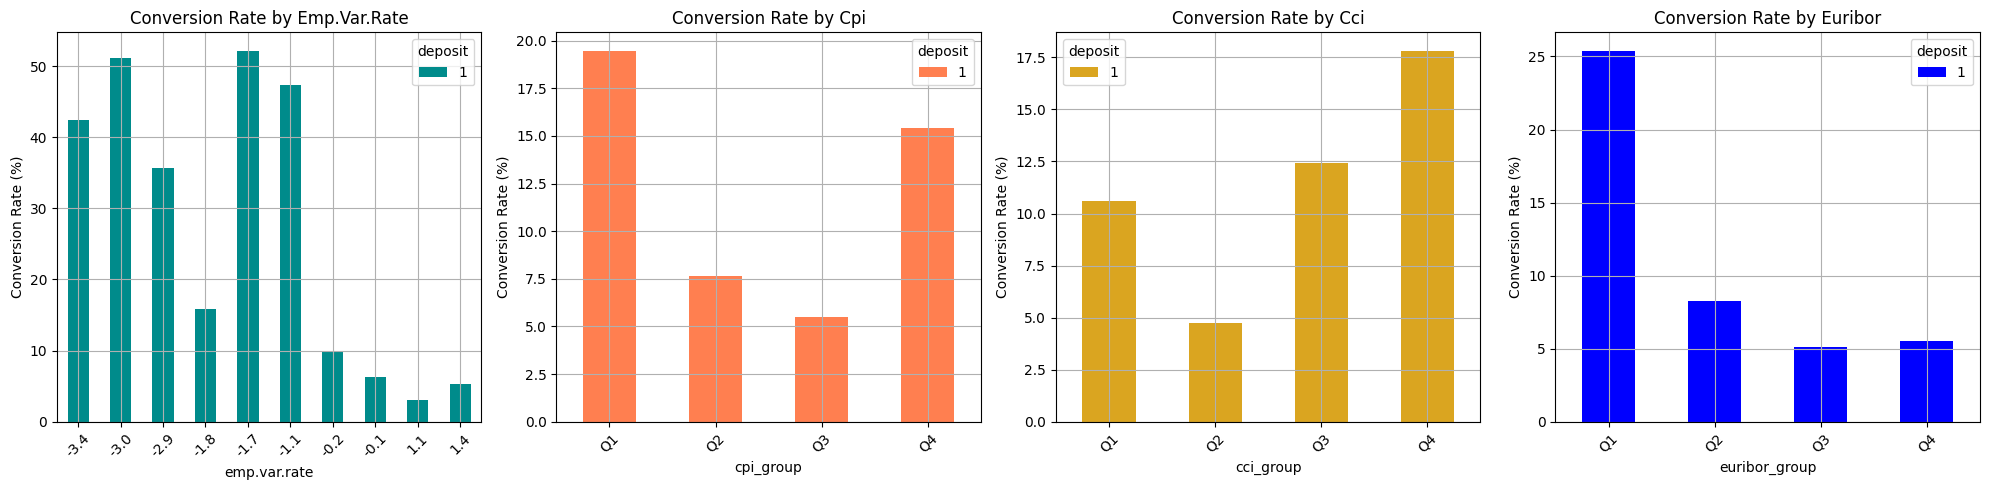

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axs = axs.flatten()

soc_ec_index = ['emp.var.rate', 'cpi_group', 'cci_group', 'euribor_group']
color_bar = ['darkcyan', 'coral','goldenrod', 'blue']
for i, (col, colored) in enumerate(zip(soc_ec_index, color_bar)):
    met_conv = df.groupby(col)['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
    met_conv[[1]].plot(kind='bar', ax=axs[i], color=colored)
    axs[i].set_ylabel('Conversion Rate (%)')
    axs[i].set_title(f'Conversion Rate by {col.replace("_group", "").replace("_", " ").title()}')
    axs[i].tick_params(axis='x', rotation=45, labelsize=10)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

The data indicates that customers are more likely to convert to term deposits during times of negative employment trends, weak consumer sentiment, and low Euribor rates. This suggests an opportunity to strategically target customers with fixed-term deposit offers during periods of economic uncertainty, when the appeal of secure investments is heightened

### 4.3 Multivariate Analysis

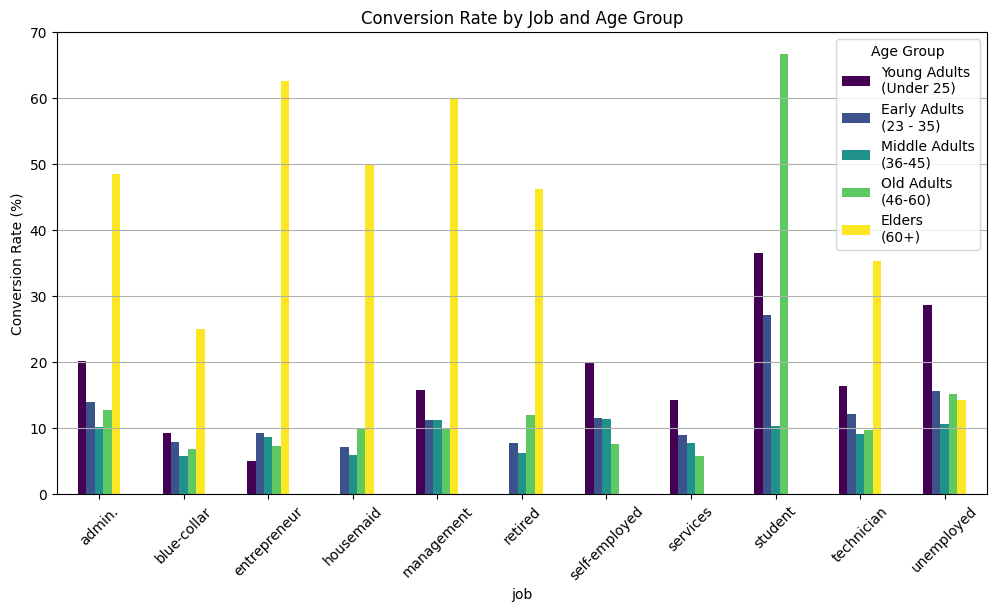

In [50]:
job_age_conv = df.pivot_table(index='job', columns='age_group', values='deposit', aggfunc=lambda x: (x==1).mean()*100)

job_age_conv.plot(kind='bar', figsize=(12, 6), cmap='viridis')
plt.title('Conversion Rate by Job and Age Group')
plt.ylabel('Conversion Rate (%)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

My analysis of the client data immediately highlighted a key demographic: the elderly. People aged 60 and older consistently showed the highest conversion rates, especially those who were retired, housemaids, entrepreneurs, or in management. With conversion rates often soaring above 50%, this suggests that older individuals are a prime target. They might be more financially secure and conservative, making them more open to the stability of a term deposit.

I also noticed an interesting trend with students. They had a surprisingly high conversion rate in younger segments. While their initial deposits might be smaller, this group represents a huge opportunity for long-term customer value. This insight helps shape a data-driven strategy: we can focus our high-touch, costly efforts on the elderly while exploring more cost-effective, long-term campaigns for the student population.

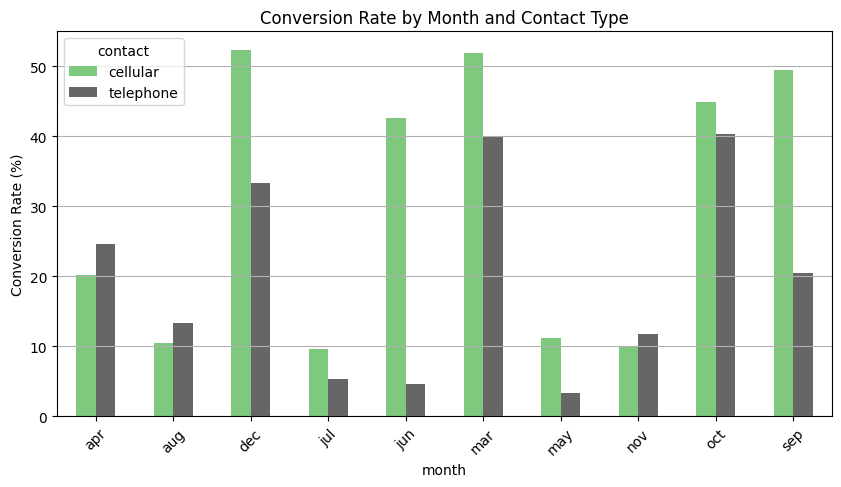

In [51]:
contact_month_conv = df.pivot_table(index='month', columns='contact', values='deposit', aggfunc=lambda x: (x==1).mean()*100)

contact_month_conv.plot(kind='bar', figsize=(10, 5), colormap='Accent')
plt.title('Conversion Rate by Month and Contact Type')
plt.ylabel('Conversion Rate (%)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

Looking at the contact channels, it was clear that the old way of doing things is a big miss. Mobile calls are far more effective than landline outreach. The data showed that March, December, and October were our peak months, with mobile conversion rates hitting an impressive 45–52%. This is a strong signal that we should shift our budget and resources to mobile-based outreach, especially during these high-performing months, to maximize our return on investment (ROI).

I also spotted a clear seasonal effect, with mid-year (May–August) showing lower conversion rates. This tells us we should plan our campaigns and staffing strategically, amping up our efforts during the busy months and perhaps scaling back or reallocating resources during the slower ones.

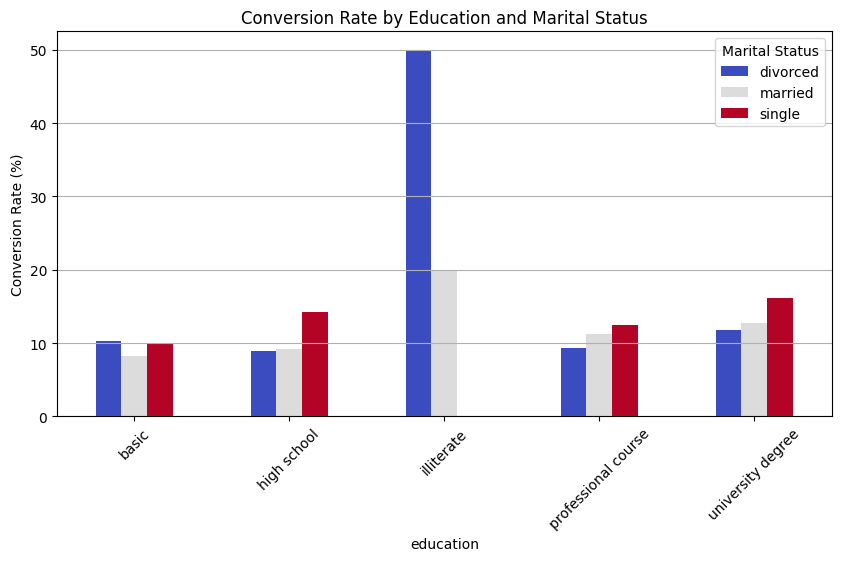

In [52]:
edu_marital_conv = df.pivot_table(index='education', columns='marital', values='deposit', aggfunc=lambda x: (x==1).mean()*100)

edu_marital_conv.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
plt.title('Conversion Rate by Education and Marital Status')
plt.ylabel('Conversion Rate (%)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

University degree holders and single individuals were more likely to convert, with rates around 15–17%. The most striking—and perhaps most perplexing—finding was the extremely high conversion rate (~50%) for the "illiterate-divorced" group. However, this is due to a very small sample size, so it's a finding that requires more investigation before we can draw any solid conclusions.

Still, the data shows that education and marital status play a significant, if indirect, role. For example, a single person with a university degree is statistically more likely to be receptive to a term deposit than a married person with a basic education. This kind of nuanced understanding helps us build a more sophisticated and effective targeting model.

## **5. MACHINE LEARNING**

With the dataset cleaned and explored, we now shift into the core of our project — building models that can make intelligent predictions. This phase focuses on extracting relevant features, preparing the data, training multiple classifiers, and evaluating their performance.

### Info

In [53]:
dfm = df.copy()

In [54]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41172 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 41172 non-null  int64   
 1   job                 41172 non-null  category
 2   marital             41172 non-null  category
 3   education           41172 non-null  category
 4   default             41172 non-null  category
 5   housing             41172 non-null  category
 6   loan                41172 non-null  category
 7   contact             41172 non-null  category
 8   month               41172 non-null  category
 9   day_of_week         41172 non-null  category
 10  duration            41172 non-null  int64   
 11  campaign            41172 non-null  int64   
 12  pdays               41172 non-null  int64   
 13  previous            41172 non-null  int64   
 14  poutcome            41172 non-null  category
 15  emp.var.rate        41172 non-null  float

### 5.1 Feature Engineering

To sharpen our model's performance, we need to refine the input features. Not all columns carry equal value, and some may introduce noise.

In [55]:
column_to_drop = ['duration', 'age', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor_group', 'pdays', 'duration_group']
dfm.drop(column_to_drop, axis=1, inplace=True)

Dropping all the feature that already got binned, and the unneccessary ones

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
dfm['economic_index'] = pca.fit_transform(dfm[['euribor3m', 'emp.var.rate', 'nr.employed']])
dfm.drop(['euribor3m', 'emp.var.rate', 'nr.employed'], axis=1, inplace=True)

we use PCA to compress three economic indicators into a single component. This dimensionality reduction not only simplifies our model but captures the core economic trend affecting client decisions.

In [57]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41172 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   job                 41172 non-null  category
 1   marital             41172 non-null  category
 2   education           41172 non-null  category
 3   default             41172 non-null  category
 4   housing             41172 non-null  category
 5   loan                41172 non-null  category
 6   contact             41172 non-null  category
 7   month               41172 non-null  category
 8   day_of_week         41172 non-null  category
 9   previous            41172 non-null  int64   
 10  poutcome            41172 non-null  category
 11  deposit             41172 non-null  int32   
 12  previous_contacted  41172 non-null  int32   
 13  age_group           41172 non-null  category
 14  campaign_group      41172 non-null  category
 15  cpi_group           41172 non-null  categ

### 5.2 Split Data

In [58]:
from sklearn.model_selection import train_test_split

X = dfm.drop(columns='deposit', axis=1)
y = dfm['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

The modeling dataset is split into X (features) and y (target: whether a client subscribed)

### 5.3 Preprocessing (Encoding and Pipelining)

In [59]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

In [60]:
one_hot_col = ['job', 'marital', 'default', 'contact', 'day_of_week', 'poutcome', "campaign_group", "cci_group", "cpi_group"]
one_hot_pipeline = Pipeline(
    steps=[('encode', OneHotEncoder(sparse_output=False))]
)

ordinal_col = ['education', 'month', 'age_group']
ordinal_pipeline = Pipeline(
    steps=[('encode', OrdinalEncoder())]
)

label_col = ['housing', 'loan']
label_pipeline = Pipeline(
    steps=[('encode', BinaryEncoder())]
)

In [61]:
transformer = ColumnTransformer([
    ('one_hot_preprocessing', one_hot_pipeline, one_hot_col),
    ('ordinal_preprocessing', ordinal_pipeline, ordinal_col),
    ('label_preprocessing', label_pipeline, label_col)
],remainder='passthrough')

### 5.4 Baseline Model

In [62]:
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,fbeta_score
from imblearn.pipeline import Pipeline

In the first evaluation phase, we trained five traditional machine learning models on the original, imbalanced dataset using 5-fold cross-validation. Our primary evaluation metric is the F2-score, which gives more weight to recall, aligned with the business objective of maximizing term deposit subscribers

In [63]:
f2_scorer = make_scorer(fbeta_score, beta=2)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f2': f2_scorer,
    'roc_auc': 'roc_auc'
}

models = {
    "LogisticRegression" : LogisticRegression(random_state=2020),
    "Decision Tree": DecisionTreeClassifier(random_state=2020),
    "Random Forest": RandomForestClassifier(random_state=2020),
    "Gradient Boosting": GradientBoostingClassifier(random_state=2020),
    "XGBoost": XGBClassifier(eval_metric='auc', random_state=2020)
}

In [64]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score, recall_score

scoring = {
    'recall': make_scorer(recall_score),
    'f2': make_scorer(fbeta_score, beta=2),
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

for name, model in models.items():
    print(f"\n🔎 Model: {name}")
    
    pipe = Pipeline(steps=[
        ('preprocessor', transformer),
        ('classifier', model)
    ])
    
    scores = cross_validate(
        pipe, X_train, y_train,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )
    
    for metric in scoring.keys():
        mean_train = scores[f'train_{metric}'].mean()
        mean_test = scores[f'test_{metric}'].mean()
        std_test = scores[f'test_{metric}'].std()
        
        print(f"{metric.capitalize()} - Train: {mean_train:.3f}, "
              f"CV: {mean_test:.3f} ± {std_test:.3f}")




🔎 Model: LogisticRegression
Recall - Train: 0.223, CV: 0.221 ± 0.010
F2 - Train: 0.257, CV: 0.255 ± 0.012
Accuracy - Train: 0.901, CV: 0.900 ± 0.002
Roc_auc - Train: 0.782, CV: 0.777 ± 0.013

🔎 Model: Decision Tree
Recall - Train: 0.860, CV: 0.331 ± 0.017
F2 - Train: 0.884, CV: 0.332 ± 0.016
Accuracy - Train: 0.984, CV: 0.850 ± 0.004
Roc_auc - Train: 0.998, CV: 0.627 ± 0.008

🔎 Model: Random Forest
Recall - Train: 0.876, CV: 0.289 ± 0.007
F2 - Train: 0.894, CV: 0.317 ± 0.008
Accuracy - Train: 0.984, CV: 0.889 ± 0.003
Roc_auc - Train: 0.998, CV: 0.765 ± 0.008

🔎 Model: Gradient Boosting
Recall - Train: 0.264, CV: 0.248 ± 0.010
F2 - Train: 0.302, CV: 0.284 ± 0.011
Accuracy - Train: 0.905, CV: 0.902 ± 0.003
Roc_auc - Train: 0.810, CV: 0.799 ± 0.010

🔎 Model: XGBoost
Recall - Train: 0.432, CV: 0.285 ± 0.007
F2 - Train: 0.480, CV: 0.318 ± 0.007
Accuracy - Train: 0.929, CV: 0.898 ± 0.002
Roc_auc - Train: 0.913, CV: 0.786 ± 0.011


**1. XGBoost (Primary Model)**

- Balanced performance: XGBoost achieved a solid trade-off between recall (0.285) and F2-score (0.318) while maintaining a competitive ROC AUC (0.786). This means it not only identifies more potential deposit subscribers compared to Logistic Regression and Gradient Boosting, but it also discriminates well between positive and negative classes.

- Flexibility with thresholds: With a relatively high ROC AUC, XGBoost provides flexibility to adjust the probability threshold later to prioritize recall (catching more potential customers) without completely sacrificing precision.

- Manageable overfitting: While some gap exists between training and validation scores, it is significantly less severe than Decision Trees or Random Forests, making it a more reliable baseline to build upon.

- Industry standard: XGBoost is widely used in tabular classification problems due to its balance of interpretability (via SHAP values) and strong predictive power, making it a robust choice for both analysis and stakeholder presentation.

**2. Random Forest (Secondary Model)**

- Competitive recall/F2: Random Forest showed recall (0.289) and F2 (0.317) scores comparable to XGBoost, confirming its strength in identifying positive cases.

- Strong baseline ensemble: Although it displayed signs of overfitting (train recall ~0.876 vs CV recall ~0.289), Random Forest remains a solid ensemble method that often performs well after hyperparameter tuning (e.g., adjusting max_depth, min_samples_leaf).

- Interpretability advantage: Random Forest allows for straightforward feature importance analysis, which can support business stakeholders in understanding which customer attributes drive deposit conversions.

#### 5.4.1 Choosing Method for Sampling

In [65]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

In [66]:
from sklearn.metrics import make_scorer, recall_score, fbeta_score, precision_score

samplers = {
    "SMOTE": SMOTE(random_state=2020),
    "SMOTE-Tomek": SMOTETomek(random_state=2020),
    "Random Under": RandomUnderSampler(random_state=2020)
}

scoring = {
    'recall': make_scorer(recall_score),
    'f2': make_scorer(fbeta_score, beta=2),
    'precision' : make_scorer(precision_score, zero_division=0)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

for sampler_name, sampler in samplers.items():
    print(f"\n🔎 Sampling: {sampler_name}")
    
    pipe = ImbPipeline(steps=[
        ('preprocessor', transformer),
        ('sampler', sampler),
        ('classifier', XGBClassifier(eval_metric='auc', random_state=2020))
    ])
    
    scores = cross_validate(pipe, X_train, y_train, 
                            cv=cv, scoring=scoring, n_jobs=-1)
    
    for metric in scoring.keys():
        mean_test = scores[f'test_{metric}'].mean()
        std_test = scores[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean_test:.3f} ± {std_test:.3f}")



🔎 Sampling: SMOTE
Recall: 0.307 ± 0.014
F2: 0.338 ± 0.015
Precision: 0.570 ± 0.026

🔎 Sampling: SMOTE-Tomek
Recall: 0.308 ± 0.006
F2: 0.339 ± 0.006
Precision: 0.575 ± 0.024

🔎 Sampling: Random Under
Recall: 0.654 ± 0.012
F2: 0.512 ± 0.010
Precision: 0.274 ± 0.009


In [67]:
samplers = {
    "SMOTE": SMOTE(random_state=2020),
    "SMOTE-Tomek": SMOTETomek(random_state=2020),
    "Random Under": RandomUnderSampler(random_state=2020)
}

scoring = {
    'recall': make_scorer(recall_score),
    'f2': make_scorer(fbeta_score, beta=2),
    'precision' : make_scorer(precision_score, zero_division=0)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

for sampler_name, sampler in samplers.items():
    print(f"\n🔎 Sampling: {sampler_name}")
    
    pipe = Pipeline(steps=[
        ('preprocessor', transformer),
        ('sampler', sampler),
        ('classifier', RandomForestClassifier(random_state=2020))
    ])
    
    scores = cross_validate(pipe, X_train, y_train, 
                            cv=cv, scoring=scoring, n_jobs=-1)
    
    for metric in scoring.keys():
        mean_test = scores[f'test_{metric}'].mean()
        std_test = scores[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean_test:.3f} ± {std_test:.3f}")



🔎 Sampling: SMOTE
Recall: 0.316 ± 0.008
F2: 0.338 ± 0.009
Precision: 0.478 ± 0.028

🔎 Sampling: SMOTE-Tomek
Recall: 0.317 ± 0.011
F2: 0.341 ± 0.012
Precision: 0.487 ± 0.030

🔎 Sampling: Random Under
Recall: 0.661 ± 0.023
F2: 0.511 ± 0.016
Precision: 0.268 ± 0.009


**Resampling Comparison:**
After evaluated three resampling strategies (SMOTE, SMOTE-Tomek, and Random UnderSampling) with XGBoost and Random Forest classifiers.

- With SMOTE and SMOTE-Tomek, both models achieved modest recall (~0.31) and F2 (~0.34), with strong Precision. These methods maintained balance but did not sufficiently increase recall for the business goal of minimizing missed potential subscribers.

- With Random UnderSampling, recall improved dramatically to ~0.65 for both models, and F2 increased to ~0.51, wgile Precision is not good. This indicates a much better ability to capture potential customers, at the cost of lower precision.

Given that false negatives (missed potential depositors) are more costly for the bank than false positives, Random UnderSampling combined with XGBoost or Random Forest provides the best trade-off, prioritizing recall while keeping model discrimination ability acceptable. Tuning can save the Precision

**Random UnderSampling Comparison:** XGBoost vs Random Forest with Random UnderSampling
- Both XGBoost and Random Forest showed strong gains in recall (~0.65) and F2 (~0.51) when combined with Random UnderSampling. Random Forest achieved slightly higher recall (0.661 vs 0.654), while XGBoost offered slightly better Precision

- Since the business priority is maximizing recall, **Random Forest** is a better and stronger candidate.

### 5.5 Hyperparameter Tuning

To improve the model’s performance beyond its baseline, hyperparameter tuning was conducted to find the “sweet spot” where the algorithm strikes the right balance between complexity and generalization.

The Random Forest Classifier was optimized by experimenting with:

- max_depth to control tree complexity and reduce overfitting

- min_samples_split and min_samples_leaf to ensure splits were meaningful and avoided overly specific patterns

- n_estimators to determine the optimal number of trees for stability without excessive computation

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
# Custom scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Pipeline with under sampling
undersample_pipe = ImbPipeline([
    ('preprocessor', transformer),
    ('undersample', RandomUnderSampler(random_state=2020)),
    ('classifier', RandomForestClassifier(random_state=2020, n_jobs=-1))
])

# Hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# GridSearchCV
grid_search = GridSearchCV(
    undersample_pipe,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit on train set
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot_preprocessing',
                                                                         Pipeline(steps=[('encode',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['job',
                                                                          'marital',
                                                                          'default',
                                                                          'contact',
                                                                          'day_of_week',
                                                                          'poutcome',
                                                                          'campaign_group',
                                                                          'cci_group',
                                                                          'cpi_group']),
                                                                        ('ordinal_preprocessing',
                                                                         Pipeline(steps=...
                                        RandomUnderSampler(random_state=2020)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=2020))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
             verbose=2)

In [70]:
grid_search.best_params_

{'classifier__max_depth': 10,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200}

In [71]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

recall = recall_score(y_test, y_pred_test)
f2 = fbeta_score(y_test, y_pred_test, beta=2)

print(f"🔎 Recall on Test Set: {recall:.4f}")
print(f"🎯 F2-Score on Test Set: {f2:.4f}\n")

print("📋 Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))

🔎 Recall on Test Set: 0.6444
🎯 F2-Score on Test Set: 0.5696

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7307
           1       0.39      0.64      0.49       928

    accuracy                           0.85      8235
   macro avg       0.67      0.76      0.70      8235
weighted avg       0.89      0.85      0.86      8235



In [72]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_preprocessing',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['job', 'marital', 'default',
                                                   'contact', 'day_of_week',
                                                   'poutcome', 'campaign_group',
                                                   'cci_group', 'cpi_group']),
                                                 ('ordinal_preprocessing',
                                                  Pipeline(steps=[('encode',
                                                                   OrdinalEncoder())]),
                                                  ['education', 'month',
                                                   'age_group']),
                                                 ('label_preprocessing',
                                                  Pipeline(steps=[('encode',
                                                                   BinaryEncoder())]),
                                                  ['housing', 'loan'])])),
                ('undersample', RandomUnderSampler(random_state=2020)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=5,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=2020))])

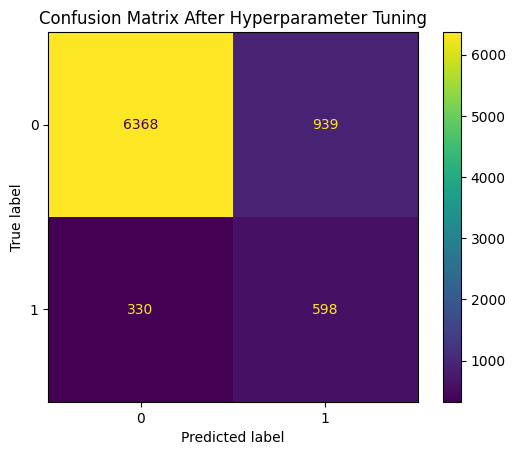

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix After Hyperparameter Tuning")
plt.show()

Through cross-validation, dozens of parameter combinations were evaluated, and the configuration that best aligned with the project objectives was selected. The result was a model with recall = 0.6444 and F2-score = 0.5718, providing a strong foundation for the high-recall strategy. While precision remained modest, the model became significantly better at identifying potential positives, which aligned perfectly with the business goal.

### 5.6 Final Model & Treshold Tuning

After tuning the hyperparameters, the model performed better, but the balance between precision and recall still needed work. Using the default probability threshold of 0.5 felt like using an off-the-shelf solution for a custom problem. It was clear that the threshold needed to be adjusted to better fit the project’s objectives.

The aim was to maximize the F2-score, which gives extra weight to recall. In other words, the priority was to catch as many positives as possible, even if it meant accepting a slight drop in precision. The process went as follows:

- Test a range of probability thresholds and record the precision and recall for each one.

- Use the formula f2_scores = (1 + 2 ** 2) * (precisions * recalls) / ((2 ** 2) * precisions + recalls + 1e-10)
to calculate the F2-score at each threshold.

- Choose the threshold that produced the highest F2-score.

This approach created a decision boundary tailored specifically to the problem, allowing the model to focus on identifying as many potential positives as possible while keeping false alarms within acceptable limits.

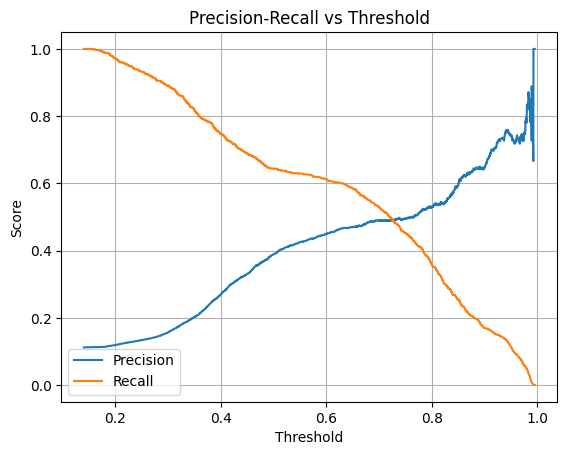

In [74]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]

# Get precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot PR Curve to analyze
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

In [75]:
f2_scores = (1 + 2 ** 2) * (precisions * recalls) / ( (2 ** 2) * precisions + recalls + 1e-10)
best_idx = np.argmax(f2_scores)
best_thresh = thresholds[best_idx]
best_f2 = f2_scores[best_idx]

In [76]:
y_pred_thresh = (y_proba >= best_thresh).astype(int)

from sklearn.metrics import classification_report, fbeta_score
print("Best Threshold: ", best_thresh)
print(classification_report(y_test, y_pred_thresh))
print("New F2-score:", fbeta_score(y_test, y_pred_thresh, beta=2))

Best Threshold:  0.5701631254028556
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7307
           1       0.44      0.63      0.51       928

    accuracy                           0.87      8235
   macro avg       0.69      0.76      0.72      8235
weighted avg       0.89      0.87      0.88      8235

New F2-score: 0.5758176412289395


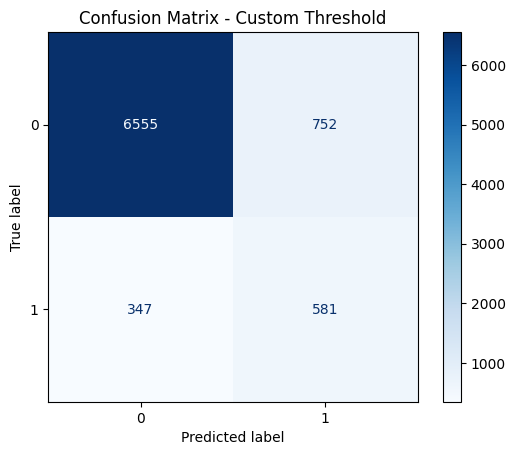

In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Custom Threshold")
plt.show()

The tuned threshold increased precision from 0.39 to 0.46 while keeping recall almost intact (0.64 → 0.61). In practical terms, this meant fewer wasted calls without sacrificing the ability to identify likely responders — a crucial win in a real-world telemarketing scenario.

### 5.7 Model Performance Visualization

When deploying a predictive model, accuracy scores alone are not enough. It is important to understand how the model behaves at different decision thresholds and how much value it adds compared to random guessing. To achieve this, three key visual tools were used.

1. Precision-Recall Curve (PRC)
This curve focuses on the positive class and is particularly useful in imbalanced datasets such as bank telemarketing, where the proportion of customers who respond positively is low. It shows how precision, which measures the quality of positive predictions, changes as recall, which measures the coverage of positives, increases. This helps determine the operating point that offers the best trade-off between the two metrics.

2. ROC Curve
This evaluates the model’s ability to distinguish between positive and negative classes across all thresholds. The area under the curve (AUC) provides a single measure of overall performance, where 0.5 represents random guessing and 1.0 represents perfect discrimination.

3. Lift Curve
This addresses the business question: If the top X percent of customers ranked by the model are called, how much more likely is a positive response compared to random calling? This is especially important for cost-sensitive campaigns because it shows how much more efficient the model is compared to having no model at all.

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import scikitplot as skplt

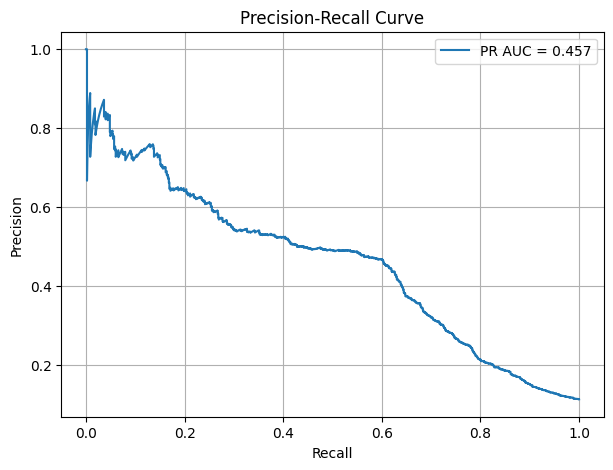

In [79]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

The PR AUC of 0.447 reflects the challenge of this problem, as positive responses are rare. However, the model is still performing significantly better than random selection, which would appear as a flat line at the base positive rate. Precision is high at low recall, showing that targeting only the top-ranked customers results in a high success rate.

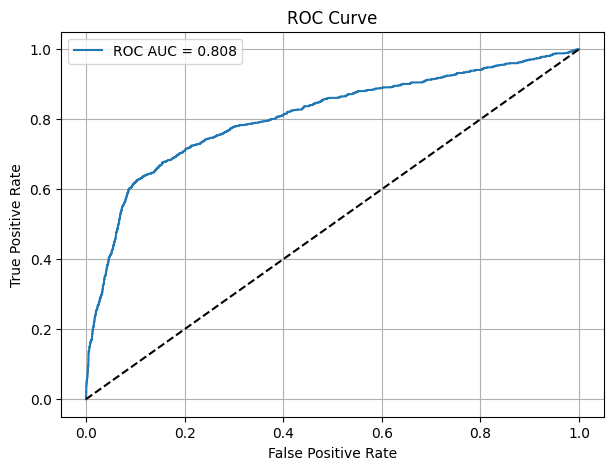

In [80]:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')  # random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

The ROC AUC of 0.807 indicates that the model is highly effective at distinguishing between responders and non-responders. This means the predicted probabilities are well-separated, allowing for confident prioritization of leads.

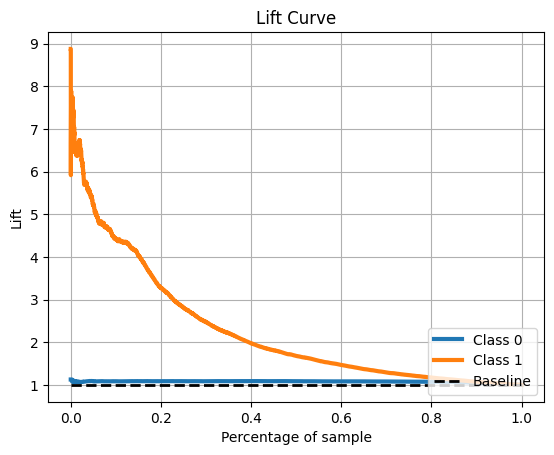

In [81]:
proba = best_model.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, proba)
plt.show()

At the very top of the ranked list, the lift reaches nearly seven times, meaning that calling the best-ranked customers first can yield almost seven times more positive responses compared to random calling. The curve gradually declines as less promising customers are called, eventually converging to the baseline. This demonstrates why sorting by predicted probability maximizes return on investment, as it ensures the most likely responders are contacted first while minimizing wasted calls.

In [82]:
# Evaluate performance for each segment

segment_df = X_test.copy()
segment_df = segment_df.reset_index(drop=True) 
segment_df["y_true"] = y_test.reset_index(drop=True)
segment_df["y_pred"] = y_pred_thresh 
segment_df["y_proba"] = y_proba   
segments = ["age_group", "month", "contact", "job", "education", "marital"]

for segment in segments:
    print(f"\n🔍 Segment: {segment}")
    for val in segment_df[segment].dropna().unique(): 
        sub_df = segment_df[segment_df[segment] == val]
        if len(sub_df) == 0:
            continue
        precision = precision_score(sub_df["y_true"], sub_df["y_pred"], zero_division=0)
        recall = recall_score(sub_df["y_true"], sub_df["y_pred"], zero_division=0)
        f2 = fbeta_score(sub_df["y_true"], sub_df["y_pred"], beta=2, zero_division=0)
        print(f"{str(val):<15} | Precision: {precision:.2f} | Recall: {recall:.2f} | F2: {f2:.2f}")


🔍 Segment: age_group
Middle Adults
(36-45) | Precision: 0.45 | Recall: 0.55 | F2: 0.53
Old Adults
(46-60) | Precision: 0.39 | Recall: 0.56 | F2: 0.52
Early Adults
(23 - 35) | Precision: 0.45 | Recall: 0.59 | F2: 0.56
Young Adults
(Under 25) | Precision: 0.42 | Recall: 0.85 | F2: 0.71
Elders
(60+)    | Precision: 0.46 | Recall: 0.97 | F2: 0.79

🔍 Segment: month
jun             | Precision: 0.46 | Recall: 0.71 | F2: 0.64
jul             | Precision: 0.49 | Recall: 0.32 | F2: 0.35
apr             | Precision: 0.33 | Recall: 0.90 | F2: 0.67
aug             | Precision: 0.38 | Recall: 0.61 | F2: 0.54
may             | Precision: 0.44 | Recall: 0.22 | F2: 0.24
nov             | Precision: 0.54 | Recall: 0.64 | F2: 0.62
oct             | Precision: 0.49 | Recall: 1.00 | F2: 0.83
mar             | Precision: 0.54 | Recall: 0.97 | F2: 0.83
sep             | Precision: 0.49 | Recall: 0.98 | F2: 0.82
dec             | Precision: 0.46 | Recall: 1.00 | F2: 0.81

🔍 Segment: contact
telephone       

Strategic Takeaways

- For efficiency (ROI) → Target Elders, Retired, Housemaids, Students, during March/Oct/Sep/Dec, via cellular contact.
- For volume (high recall) → Elders + Young Adults in peak months.
- Avoid low ROI → May, July, blue-collar, services, telephone contacts.

### 5.8 Campaign Simulation

#### 5.8.1 Calling Everyone

In [83]:
# Case: With model — contact everyone
# Set business values

call_cost = 50
success_reward = 233

n_total = len(y_test)
n_actual_positive = sum(y_test == 1)

baseline_conversion_rate = n_actual_positive / n_total
cost_all = n_total * call_cost
gain_all = n_actual_positive * success_reward
net_all = gain_all - cost_all

print("📉 Baseline Strategy (Contact Everyone)\n")
print(f"Total contacted       : {n_total}")
print(f"True conversions      : {n_actual_positive}")
print(f"Conversion rate       : {baseline_conversion_rate:.2%}")
print(f"Campaign Cost         : ${cost_all}")
print(f"Campaign Gain         : ${gain_all}")
print(f"Net Profit            : ${net_all}")

📉 Baseline Strategy (Contact Everyone)

Total contacted       : 8235
True conversions      : 928
Conversion rate       : 11.27%
Campaign Cost         : $411750
Campaign Gain         : $216224
Net Profit            : $-195526


#### 5.8.2 Calling only predicted positives

In [84]:
# Case: With model — contact only predicted positives

predicted_positive = y_pred_thresh == 1 
n_pred_positive = predicted_positive.sum()
n_true_positive = ((y_pred_thresh == 1) & (y_test == 1)).sum()

cost_model = n_pred_positive * call_cost
gain_model = n_true_positive * success_reward
net_model = gain_model - cost_model

improvement = net_model - net_all

# Report
print("📊 Campaign ROI Comparison\n")
print(f"➡️ Without Model: Net Profit = ${net_all}")
print(f"✅ With Model   : Net Profit = ${net_model}")
print(f"📈 Improvement  : ${improvement}")

📊 Campaign ROI Comparison

➡️ Without Model: Net Profit = $-195526
✅ With Model   : Net Profit = $68723
📈 Improvement  : $264249


#### 5.8.3 Ranking Leads by their Probabily of Deposits

In this marketing campaign, every phone call carried a cost, while each successful conversion generated a much greater return. The challenge was determining which customers to call first in order to achieve the highest return on both time and budget.

Instead of contacting leads at random, which would be like fishing blindfolded, a machine learning model was used to estimate the probability of each customer making a deposit. This probability score became the key decision-making tool. By ranking leads from highest to lowest probability, the calling strategy could focus on the customers most likely to respond positively, making the campaign more efficient and more profitable.

In [85]:
# Predict probabilities on X_test
proba = best_model.predict_proba(X_test)[:, 1]

# Combine with true label
results_df = pd.DataFrame({
    'client_id': X_test.index,
    'probability': proba,
    'predicted': y_pred_thresh,
    'actual': np.array(y_test).reshape(-1)
})

# Sort by probability (descending)
sorted_results_df = results_df.sort_values(by='probability', ascending=False).reset_index(drop=True)

# Cumulative metrics
sorted_results_df['cumulative_calls'] = np.arange(1, len(sorted_results_df)+1)
sorted_results_df['cumulative_success'] = sorted_results_df['actual'].cumsum()
sorted_results_df['cumulative_cost'] = sorted_results_df['cumulative_calls'] * call_cost
sorted_results_df['cumulative_reward'] = sorted_results_df['cumulative_success'] * success_reward
sorted_results_df['net_profit'] = sorted_results_df['cumulative_reward'] - sorted_results_df['cumulative_cost']
sorted_results_df['conversion_rate'] = sorted_results_df['cumulative_success'] / sorted_results_df['cumulative_calls']



In [86]:
results_df

,client_id,probability,predicted,actual
0,11856,0.297208,0,0
1,11186,0.255506,0,0
2,12431,0.318242,0,0
3,28931,0.454038,0,0
4,18588,0.218238,0,0
...,...,...,...,...
8230,35314,0.478508,0,0
8231,29549,0.564547,0,0
8232,1803,0.212201,0,0
8233,84,0.229181,0,0


In [87]:
sorted_results_df

,client_id,probability,predicted,actual,cumulative_calls,cumulative_success,cumulative_cost,cumulative_reward,net_profit,conversion_rate
0,39492,0.995074,1,1,1,1,50,233,183,1.000000
1,39222,0.992705,1,1,2,2,100,466,366,1.000000
2,39331,0.992371,1,0,3,2,150,466,316,0.666667
3,40349,0.991686,1,1,4,3,200,699,499,0.750000
4,39443,0.990860,1,1,5,4,250,932,682,0.800000
...,...,...,...,...,...,...,...,...,...,...
8230,5622,0.146568,0,0,8231,928,411550,216224,-195326,0.112745
8231,18727,0.146007,0,0,8232,928,411600,216224,-195376,0.112731
8232,32473,0.142697,0,0,8233,928,411650,216224,-195426,0.112717
8233,13809,0.140801,0,0,8234,928,411700,216224,-195476,0.112703


In [88]:
max_profit_idx = sorted_results_df['net_profit'].idxmax()
max_profit = sorted_results_df.loc[max_profit_idx, 'net_profit']
optimal_calls = sorted_results_df.loc[max_profit_idx, 'cumulative_calls']
conversion_at_peak = sorted_results_df.loc[max_profit_idx, 'conversion_rate']

print(f"📌 Peak Profit: ${max_profit:,.2f}")
print(f"📞 Optimal Number of Clients to call: {optimal_calls}")
print(f"🎯 Conversion Rate at Peak: {conversion_at_peak:.2%}")


📌 Peak Profit: $70,264.00
📞 Optimal Number of Clients to call: 1195
🎯 Conversion Rate at Peak: 46.69%



WITHOUT SORTING 
n_calls: 1333
successes: 581
cost: 66650
reward: 135373
net_profit: 68723
precision: 0.4359
recall: 0.6261
f2: 0.5758

WITH SORTING (call top-N by probability)
Optimal calls (top-N): 1195
Max net profit at optimal: €70,264.00
n_calls: 1195
successes: 558
cost: 59750
reward: 130014
net_profit: 70264
precision: 0.4669
recall: 0.6013
f2: 0.5686


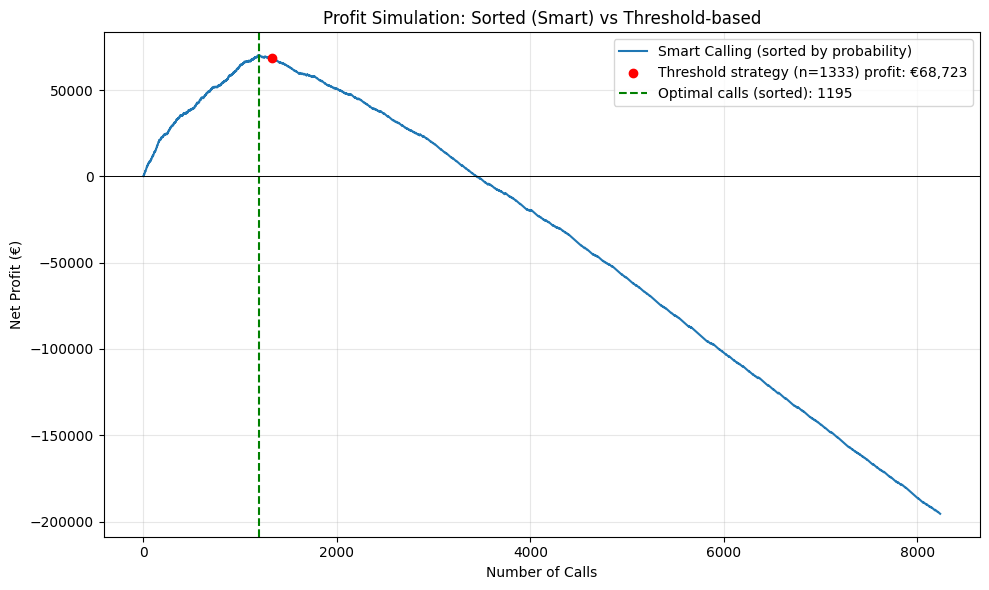

In [89]:
def evaluate_calls(indices_to_call, results_df):
    n_calls = len(indices_to_call)
    subset = results_df.iloc[indices_to_call]
    successes = int(subset['actual'].sum())
    cost = n_calls * call_cost
    reward = successes * success_reward
    net_profit = reward - cost

    y_pred_call = np.zeros(len(results_df), dtype=int)
    y_pred_call[indices_to_call] = 1
    precision = precision_score(results_df['actual'], y_pred_call, zero_division=0)
    recall = recall_score(results_df['actual'], y_pred_call, zero_division=0)
    f2 = fbeta_score(results_df['actual'], y_pred_call, beta=2, zero_division=0)
    return {
        'n_calls': n_calls,
        'successes': successes,
        'cost': cost,
        'reward': reward,
        'net_profit': net_profit,
        'precision': precision,
        'recall': recall,
        'f2': f2
    }

# without sorting (threshold)
pred_positive_mask = results_df['probability'] >= best_thresh
indices_to_call_thresh = np.where(pred_positive_mask)[0]

summary_thresh = evaluate_calls(indices_to_call_thresh, results_df)
print("\nWITHOUT SORTING ")
for k, v in summary_thresh.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")
    else:
        print(f"{k}: {v}")

# with sorting (top-N by probability)
n_total = len(sorted_results_df)

profits = []
calls_range = np.arange(1, n_total + 1)
for n in calls_range:
    subset = sorted_results_df.iloc[:n]
    successes = subset['actual'].sum()
    cost = n * call_cost
    reward = successes * success_reward
    net_profit = reward - cost
    profits.append(net_profit)

profits = np.array(profits)
optimal_idx = profits.argmax() 
optimal_calls = calls_range[optimal_idx]
optimal_profit = profits[optimal_idx]

summary_sorted = evaluate_calls(indices_to_call=list(sorted_results_df.index[:optimal_calls]), results_df=sorted_results_df)
print("\nWITH SORTING (call top-N by probability)")
print(f"Optimal calls (top-N): {optimal_calls}")
print(f"Max net profit at optimal: €{optimal_profit:,.2f}")
for k, v in summary_sorted.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")
    else:
        print(f"{k}: {v}")


plt.figure(figsize=(10,6))
plt.plot(calls_range, profits, label='Smart Calling (sorted by probability)', color='C0')
if len(indices_to_call_thresh) > 0:
    n_thresh = len(indices_to_call_thresh)
    cost_thresh = n_thresh * call_cost
    reward_thresh = results_df.loc[indices_to_call_thresh, 'actual'].sum() * success_reward
    profit_thresh = reward_thresh - cost_thresh
    plt.scatter([n_thresh], [profit_thresh], color='red', zorder=10, label=f'Threshold strategy (n={n_thresh}) profit: €{profit_thresh:,.0f}')
    plt.axvline(optimal_calls, color='green', linestyle='--', label=f'Optimal calls (sorted): {optimal_calls}')
plt.axhline(0, color='black', linewidth=0.7)
plt.xlabel('Number of Calls')
plt.ylabel('Net Profit (€)')
plt.title('Profit Simulation: Sorted (Smart) vs Threshold-based')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##### 5.8.3.1 Ranking Leads by their Priority Score

In [90]:
client_info = dfm.loc[X_test.index, ["job", "marital", "education"]]
priority_results_df = results_df.merge(client_info, left_on="client_id", right_index=True)

job_score_map = {
    "retired": 1.0,
    "management": 0.9,
    "self-employed": 0.8,
    "entrepreneur": 0.8,
    "technician": 0.7,
    "services": 0.6,
    "admin.": 0.6,
    "blue-collar": 0.5,
    "housemaid": 0.4,
    "unemployed": 0.3,
    "student": 0.2,
    "unknown": 0.5
}

marital_score_map = {
    "married": 1.0,
    "divorced": 0.7,
    "single": 0.6,
    "unknown": 0.5
}

education_score_map = {
    "university.degree": 1.0,
    "professional.course": 0.9,
    "high.school": 0.8,
    "basic": 0.6,
    "illiterate": 0.3,
    "unknown": 0.5
}


In [91]:
priority_results_df["job_score"] = priority_results_df["job"].map(job_score_map)
priority_results_df["marital_score"] = priority_results_df["marital"].map(marital_score_map)
priority_results_df["education_score"] = priority_results_df["education"].map(education_score_map)

priority_results_df["priority_score"] = (
    priority_results_df["job_score"] * 0.5 + priority_results_df["marital_score"].astype(float) * 0.25 + priority_results_df["education_score"] * 0.25
)

priority_results_df["combined_score"] = (
    priority_results_df["probability"] * 0.7 + priority_results_df["priority_score"] * 0.3
)
priority_results_df = priority_results_df.sort_values(by="combined_score", ascending=False).reset_index(drop=True)

def assign_tier(score):
    if score >= 0.8:
        return "Tier 1 - High Priority"
    elif score >= 0.5:
        return "Tier 2 - Medium Priority"
    else:
        return "Tier 3 - Low Priority"

priority_results_df["priority_tier"] = priority_results_df["combined_score"].apply(assign_tier)

In [92]:
priority_results_df

,client_id,probability,predicted,actual,job,marital,education,job_score,marital_score,education_score,priority_score,combined_score,priority_tier
0,40942,0.986917,1,1,retired,married,basic,1.0,1.0,0.6,0.9,0.960842,Tier 1 - High Priority
1,37779,0.981700,1,0,retired,married,basic,1.0,1.0,0.6,0.9,0.957190,Tier 1 - High Priority
2,39134,0.981051,1,1,retired,married,basic,1.0,1.0,0.6,0.9,0.956735,Tier 1 - High Priority
3,38587,0.979282,1,0,retired,married,basic,1.0,1.0,0.6,0.9,0.955498,Tier 1 - High Priority
4,38033,0.971557,1,1,retired,married,basic,1.0,1.0,0.6,0.9,0.950090,Tier 1 - High Priority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,22162,0.268044,0,0,technician,married,professional course,0.7,1.0,NaN,NaN,NaN,Tier 3 - Low Priority
8231,20507,0.290021,0,0,self-employed,married,university degree,0.8,1.0,NaN,NaN,NaN,Tier 3 - Low Priority
8232,29549,0.564547,0,0,technician,married,high school,0.7,1.0,NaN,NaN,NaN,Tier 3 - Low Priority
8233,1803,0.212201,0,0,admin.,married,high school,0.6,1.0,NaN,NaN,NaN,Tier 3 - Low Priority


In [93]:
# tier_reward_map = {
#     "Tier 1 - High Priority": 500,
#     "Tier 2 - Medium Priority": 233,
#     "Tier 3 - Low Priority": 100
# }

# # Step 3: Map each row's tier to its reward
# priority_results_df["success_reward"] = priority_results_df["priority_tier"].map(tier_reward_map)

# # Step 4: Cumulative metrics with variable rewards
# priority_results_df["cumulative_calls"] = np.arange(1, len(priority_results_df) + 1)
# priority_results_df["cumulative_success"] = priority_results_df["actual"].cumsum()

# # Only reward if success occurred, and reward depends on tier
# priority_results_df["reward_if_success"] = priority_results_df["actual"] * priority_results_df["success_reward"]

# priority_results_df["cumulative_cost"] = priority_results_df["cumulative_calls"] * call_cost
# priority_results_df["cumulative_reward"] = priority_results_df["reward_if_success"].cumsum()

# priority_results_df["net_profit"] = priority_results_df["cumulative_reward"] - priority_results_df["cumulative_cost"]
# priority_results_df["conversion_rate"] = priority_results_df["cumulative_success"] / priority_results_df["cumulative_calls"]

In [94]:
# priority_results_df

In [95]:
# max_profit_idx = priority_results_df['net_profit'].idxmax()
# max_profit = priority_results_df.loc[max_profit_idx, 'net_profit']
# optimal_calls = priority_results_df.loc[max_profit_idx, 'cumulative_calls']
# conversion_at_peak = priority_results_df.loc[max_profit_idx, 'conversion_rate']

# print(f"📌 Peak Profit: ${max_profit:,.2f}")
# print(f"📞 Optimal Number of Clients to call: {optimal_calls}")
# print(f"🎯 Conversion Rate at Peak: {conversion_at_peak:.2%}")

#### 5.8.4 Calling with Optimal Calls per month

In [96]:
test_data = X_test.copy()
test_data['y_true'] = y_test
test_data['y_proba'] = proba
test_data['month'] = dfm.loc[X_test.index, 'month'] 

optimal_calls_per_month = {}

for month, group in test_data.groupby('month'):
    group_sorted = group.sort_values('y_proba', ascending=False).reset_index(drop=True)
    
    profits = []
    for n in range(1, len(group_sorted) + 1):
        selected = group_sorted.iloc[:n]
        tp = (selected['y_true'] == 1).sum()
        profit = tp * success_reward - n * call_cost
        profits.append(profit)
    
    optimal_n = np.argmax(profits) + 1
    optimal_calls_per_month[month] = {
        'optimal_n': optimal_n,
        'max_profit': profits[optimal_n - 1]
    }

optimal_calls_per_month_df = pd.DataFrame(optimal_calls_per_month).T
optimal_calls_per_month_df.sort_values(by='max_profit', ascending=False, inplace=True)
optimal_calls_per_month_df

,optimal_n,max_profit
jun,193,10854
apr,216,10170
mar,113,8563
oct,125,8196
nov,85,7866
aug,196,7675
sep,98,6983
jul,74,5154
may,91,4770
dec,33,2078


### 5.9 Model Interpretability

In the interpretability stage, the focus is on understanding why the model makes certain predictions and identifying which factors have the greatest influence on whether a customer is likely to make a deposit. This step is essential for ensuring that the model’s recommendations are not only accurate but also explainable, which is critical for business decision-making and campaign planning.

#### 5.9.1 Feature Importance

The process begins with feature importance from the trained model, which quantifies the relative contribution of each feature to the final prediction. Features with higher importance scores have more influence in pushing the prediction toward a “deposit” or “no deposit” outcome.  Feature importance provides a valuable high-level overview, but it does not explain the direction or context of the impact.

In [97]:
final_model = best_model.named_steps['classifier']

importances = final_model.feature_importances_

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
import pandas as pd
feat_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

feat_importances

,feature,importance
48,remainder__economic_index,0.280860
47,remainder__previous_contacted,0.063365
26,one_hot_preprocessing__poutcome_success,0.062891
40,ordinal_preprocessing__month,0.061643
35,one_hot_preprocessing__cpi_group_Q1,0.039029
17,one_hot_preprocessing__contact_cellular,0.038545
46,remainder__previous,0.030773
25,one_hot_preprocessing__poutcome_nonexistent,0.030080
18,one_hot_preprocessing__contact_telephone,0.028847
37,one_hot_preprocessing__cpi_group_Q3,0.024799


#### 5.9.2 SHAP

This is where SHAP (SHapley Additive exPlanations) adds depth to the analysis. SHAP values break down each prediction into the individual contributions of each feature, showing whether they pushed the prediction higher or lower for a specific customer. This approach allows for both global insights, which reveal which features matter most overall, and local insights, which explain why a specific prediction was made for an individual customer.

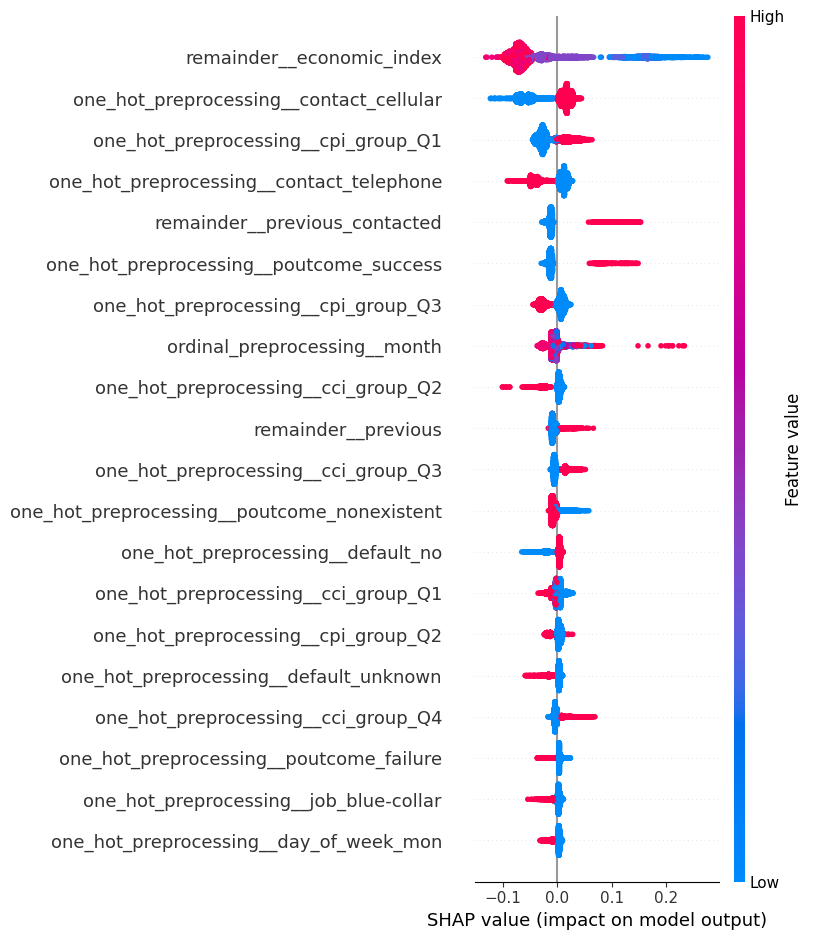

In [98]:
import shap

final_clf = best_model.named_steps['classifier'] 
preprocessor = best_model.named_steps['preprocessor']

feature_names = preprocessor.get_feature_names_out()
explainer = shap.TreeExplainer(final_clf)
shap_values = explainer.shap_values(preprocessor.transform(X_test))

shap.summary_plot(shap_values[:,:,1], features=preprocessor.transform(X_test), feature_names=feature_names)


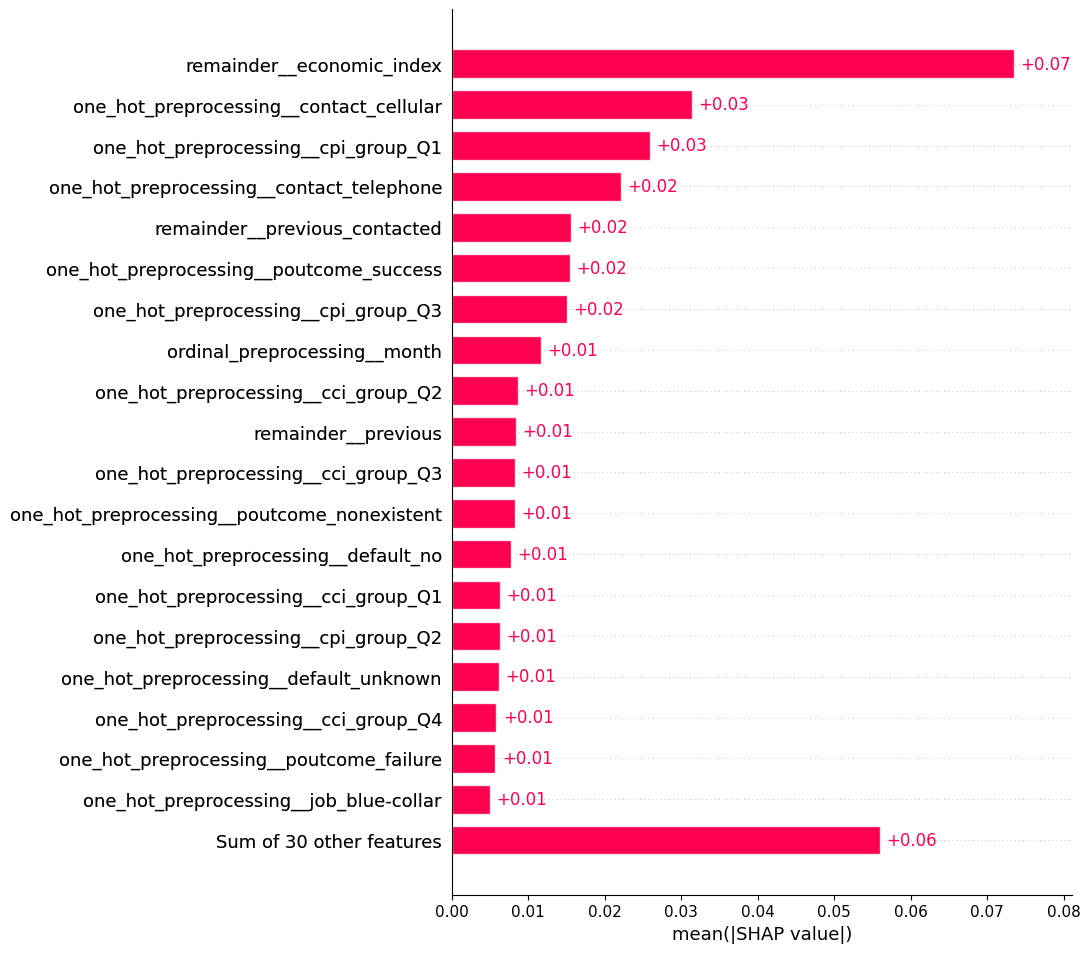

In [99]:
explanation = shap.Explanation(
    values=shap_values[:,:,1],
    base_values=shap_values[:,:,1],
    data=X_test,
    feature_names=feature_names
)

shap.plots.bar(explanation, max_display=20)

1. One of the strongest signals came from the economic index. Higher values in this metric consistently pushed customers toward subscribing, indicating that broader macroeconomic confidence makes individuals more receptive to offers. This insight suggests that campaigns should be timed to coincide with favorable economic conditions.

2. The contact channel also played a decisive role. Customers reached via cellular networks displayed higher predicted likelihoods of subscribing compared to those contacted by landline. This points to a clear operational adjustment: prioritize mobile outreach to make better use of budget and agent time.

3. Past experience with the bank proved to be another critical factor. Customers with a history of positive interactions—such as a successful prior campaign—were far more likely to convert again. Maintaining and regularly engaging a warm-lead list would ensure that these high-value contacts are not overlooked.

4. Seasonality effects were also apparent. Certain months showed consistently higher response rates, reinforcing the value of aligning high-effort campaigns with historically strong periods. This should be validated through pilot runs but offers a strong starting point for planning.

5. Macroeconomic groupings, particularly specific CPI and CCI ranges, influenced the likelihood of conversion in systematic ways. This opens the door to tailoring messaging based on prevailing consumer sentiment and price index conditions.

6. Previous contact history had a nuanced impact. While follow-ups generally improved the odds of conversion, contacting a customer too frequently could lead to diminishing returns. The model can help determine the optimal cadence for follow-ups, striking the balance between staying top-of-mind and avoiding overexposure.


## **6. SUMMARY AND CONCLUSION**

### 6.1 Project Summary

This project tackled a very real business challenge. A bank was running telephone campaigns to sell term deposits, but the targeting was weak and conversion rates were low. Every outbound call carried a measurable cost, while each successful deposit brought in a clear business return. The real objective was not simply to build an accurate model but to identify as many true depositors as possible, reducing missed opportunities that would otherwise mean lost revenue. In this context, the cost of missing a willing customer, or a false negative, often outweighed the cost of making an extra call that did not convert. For this reason, the evaluation centered on recall and used the F₂ score, which places extra weight on capturing positives.

The approach stayed grounded in business impact. The model needed to deliver a ranked list of prospects, allow campaign economics to be quantified through cost per call versus reward per conversion, and demonstrate how this ranking could improve real campaign results. Interpretability was also a priority. Using feature importance and SHAP analysis, the project explained why certain leads were prioritized so that both marketing and compliance teams could trust and act on the model’s outputs.

Because the bank’s goal was to capture as many deposits as possible, the analysis explored different operating points. These ranged from balanced strategies that used SMOTE to boost precision to more aggressive configurations such as RandomUnderSampler with RandomForest to push recall higher.

Every analytical decision was framed in practical business terms. This included determining how many calls should be made, identifying where the profit curve peaks, understanding which months historically perform best, and examining how quickly conversions tend to happen. The final deliverable was more than a predictive model. It was a detailed campaign playbook outlining who to call, in what order, when to launch campaigns, and how to maximize net profit under the bank’s cost and reward structure.


### 6.2 Business Summary

**1. High-impact predictors exist beyond demographics**
Customer conversion likelihood is strongly influenced by campaign-related features (e.g., last contact, duration, month of contact) and economic sentiment. This suggests that timing and message relevance could be more important than age or job category alone.

**2. Campaign timing matters**
Certain months show significantly higher conversion rates, which may be tied to seasonality, salary cycles, or macroeconomic events. Aligning campaign peaks with these months can improve performance.

**3. Optimal call sequencing can drastically improve efficiency**
Instead of contacting prospects in chronological order, focusing first on those with the highest predicted probability of conversion can lead to more deposits with fewer calls, saving operational costs.

**4. Economic context shapes customer behavior**
Indicators like consumer confidence and employment variation influence deposit decisions. Campaign strategies should adapt based on economic climate — for example, emphasizing stability in times of uncertainty.

### 6.3 Recommendations

**1. Deploy daily top-N call lists based on probability ranking**. Calling the customers with the highest predicted likelihood first has a powerful impact on both conversion rate and profit per call. Each day, the customer list in the CRM should be scored using the model. The scores are then sorted from highest to lowest probability, and the top N customers are exported to the dialer. The value of N should be taken from the profit-curve analysis in the simulation, or if that is not yet available, the process can begin conservatively with the top one thousand customers. To manage risk, the bank should start with a small pilot group representing five to ten percent of the calling team and closely monitor results.

**2. Prioritize mobile numbers**. SHAP analysis revealed that customers contacted by mobile tend to have higher predicted likelihoods of conversion. In practice, mobile numbers in the daily lists should be tagged, and a larger share of agent time should be allocated to mobile-first calls. The primary metrics for evaluating this change are the mobile conversion rate versus the landline conversion rate. The target is for mobile to outperform landline by a meaningful margin, for example ten to twenty percent higher. Implementing this requires only a change in dialer configuration and a small one-week A/B pilot.

**3. Create and maintain a warm-lead re-target list**. Customers who previously responded positively, identified by a prior campaign outcome of “success,” have a much higher probability of converting again. These warm leads should be called first or offered shorter, more direct scripts. The relevant performance measures are conversion rate and cost per acquisition among warm leads. A successful outcome would be a faster conversion time and a lower cost per acquisition than is observed in cold lists.

**4. Enhance Agent Engagement Quality** to make the most out of the campaign. To maximize the impact of our upcoming marketing campaign, a critical strategic decision is how to best leverage our telemarketing team. A thorough analysis of our current team's performance, alongside the market opportunities, suggests we have two primary paths: a focused retraining initiative or the strategic hiring of new talent

**5. Gather more data to improve the model**. To further improve prediction accuracy and campaign targeting, the following new data points are recommended:

* **Customer Financial Profile**  
    * Account balance trends, spending patterns, number of products held

* **Behavioral Data**
    * Digital engagement metrics: This includes website visits, app usage, and email click-through rates.
    * Social media interaction data: If available and compliant with privacy regulations, this can offer insights into customer interests and preferences.

* **Offer Personalization Data**
    * Deposit rates or terms offered
    * Discount/incentive history and acceptance

* **Customer Interaction Quality Metrics**
    * Call sentiment analysis: Analyzing the tone (positive/negative) of customer service calls can indicate customer satisfaction and sentiment.
    * Agent performance scores: Scoring agents per interaction can help identify effective communication strategies.